In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/esperadeixatentar/diabetic_data.csv


In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Importing libraries and loading dataset from drive



In [46]:
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler  
from sklearn import metrics  
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score  

In [47]:
df = pd.read_csv("/kaggle/input/esperadeixatentar/diabetic_data.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [48]:
df = df.replace("?",np.nan)
len(df.select_dtypes('O').columns)

37

#PREPROCESSING AND EDA


In [49]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

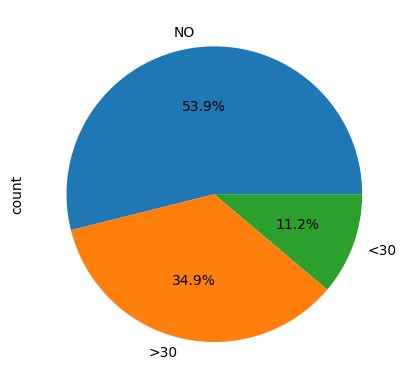

In [51]:
counts = df['readmitted'].value_counts()  
percentages = counts * 100 / len(df)  
fig, ax = plt.subplots() 
percentages.plot(kind='pie', ax=ax, autopct='%1.1f%%') 
plt.show()  

In [52]:
df.isnull().sum()[df.isnull().sum()>1]/len(df)*100

race                  2.233555
weight               96.858479
payer_code           39.557416
medical_specialty    49.082208
diag_1                0.020636
diag_2                0.351787
diag_3                1.398306
max_glu_serum        94.746772
A1Cresult            83.277322
dtype: float64

In [53]:
df.drop(['weight','payer_code','medical_specialty'],axis=1,inplace=True)

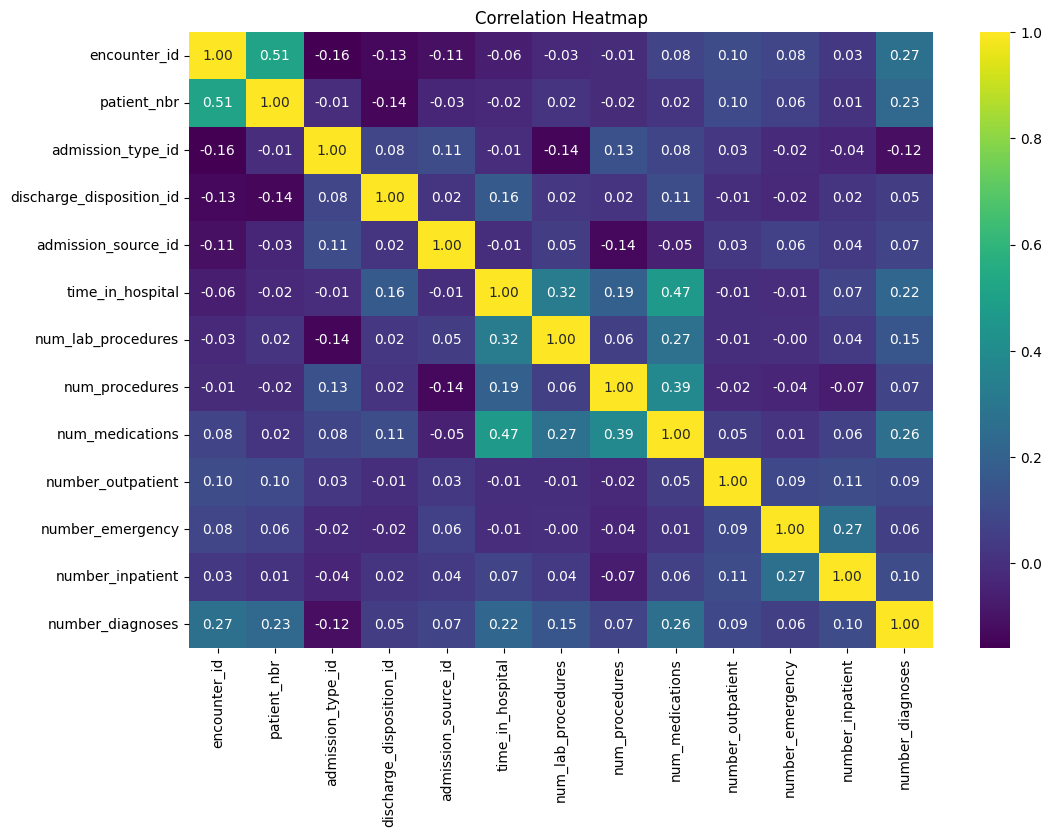

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [55]:
df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

/tmp/ipykernel_33/2013943360.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"NO": 0, "<30": 1, ">30": 0})


readmitted
0    90409
1    11357
Name: count, dtype: int64


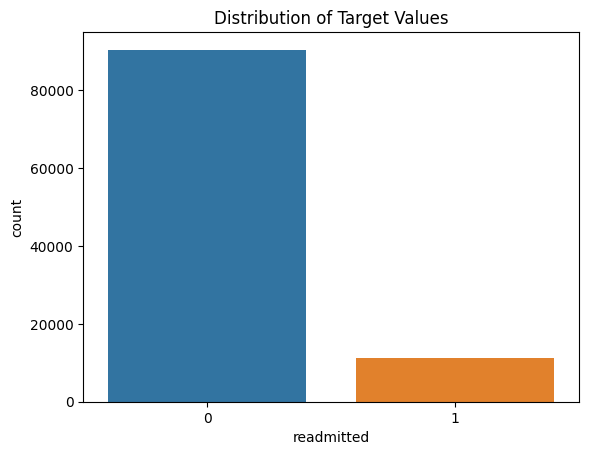

In [56]:
# Replace values in the 'readmitted' column with numerical values (0 and 1)
df = df.replace({"NO": 0, "<30": 1, ">30": 0})
print(df.readmitted.value_counts())
sns.countplot(x="readmitted", data=df)  
plt.title("Distribution of Target Values")  
plt.show()  


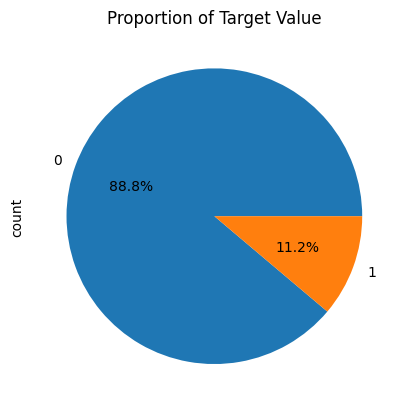

In [57]:
df.readmitted.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

Proportion of Race
race
Caucasian          76.486788
AfricanAmerican    19.307891
Hispanic            2.047380
Other               1.513674
Asian               0.644266
Name: proportion, dtype: float64


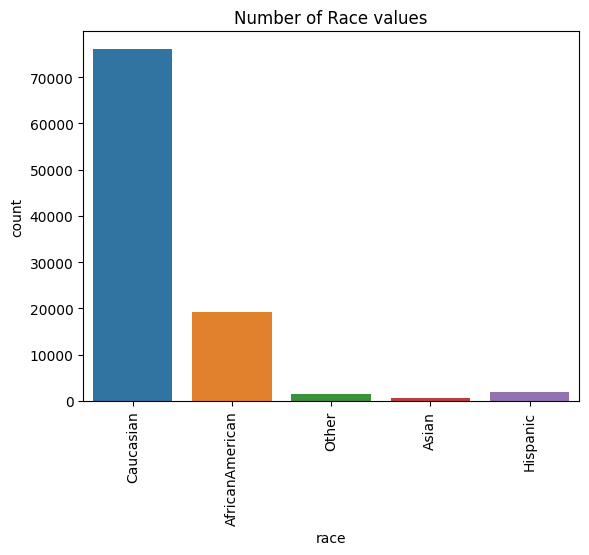

In [58]:
print("Proportion of Race")
print(df.race.value_counts(normalize=True) * 100)
sns.countplot(x=df.race, data=df)  
plt.xticks(rotation=90)  
plt.title("Number of Race values") 
plt.show()  

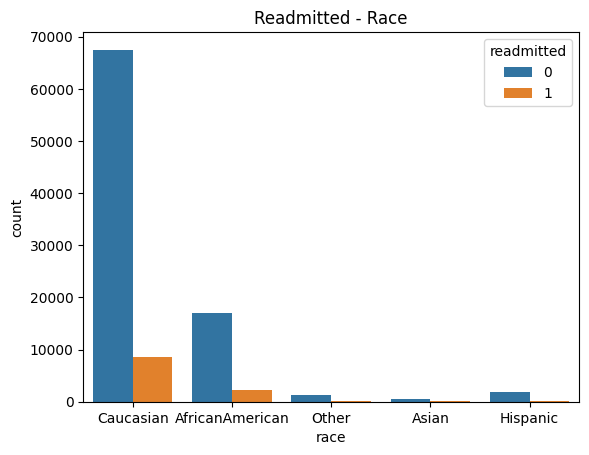

In [59]:
sns.countplot(x="race", hue= "readmitted", data = df)
plt.title("Readmitted - Race")
plt.show()

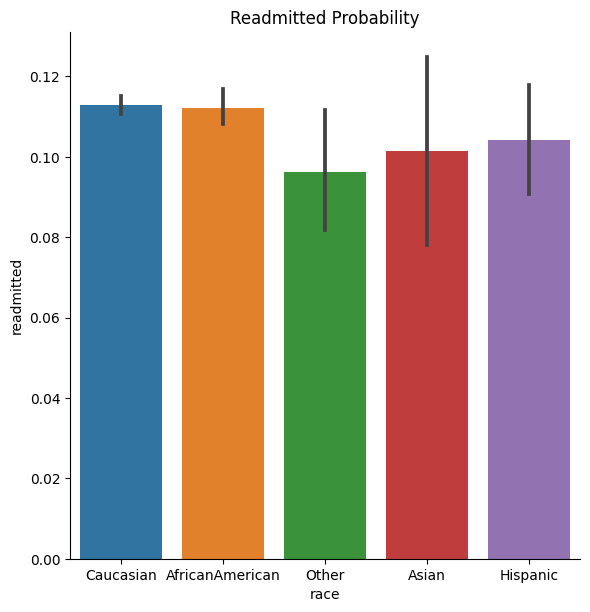

In [60]:
sns.catplot(x = "race", y = "readmitted",data = df, kind = "bar", height= 6)
plt.title("Readmitted Probability")
plt.show()

Proportions of Race Value
gender
Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: proportion, dtype: float64


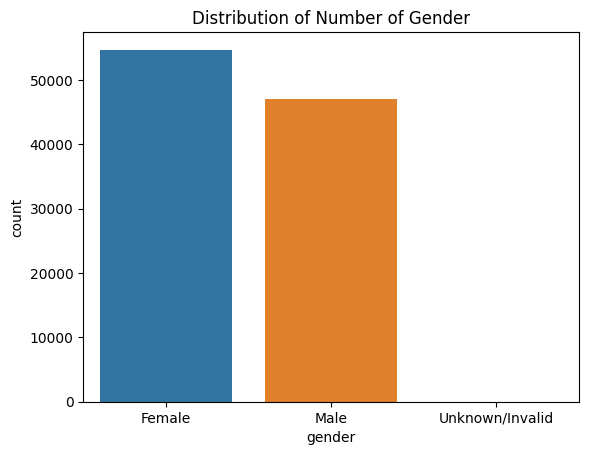

In [61]:
print("Proportions of Race Value")
print(df.gender.value_counts(normalize = True))

sns.countplot(x = "gender", data = df)
plt.title("Distribution of Number of Gender")
plt.show()


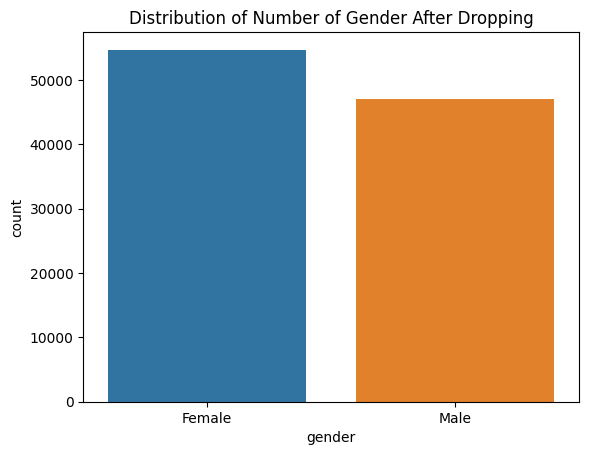

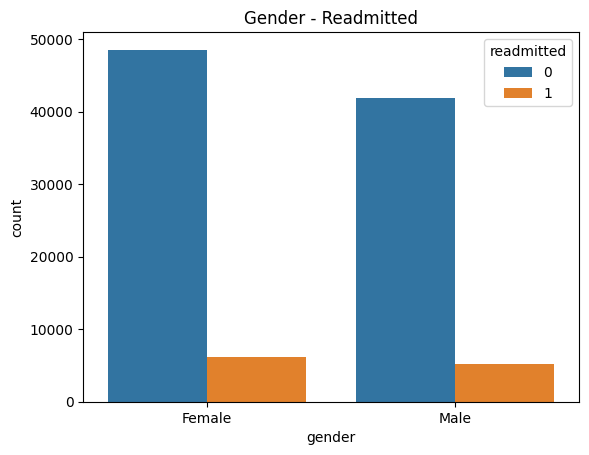

In [62]:
df = df.drop(df.loc[df["gender"]=="Unknown/Invalid"].index, axis=0)

sns.countplot(x = "gender", data = df)
plt.title("Distribution of Number of Gender After Dropping")
plt.show()

sns.countplot(x = "gender", hue = "readmitted", data = df)
plt.title("Gender - Readmitted")
plt.show()

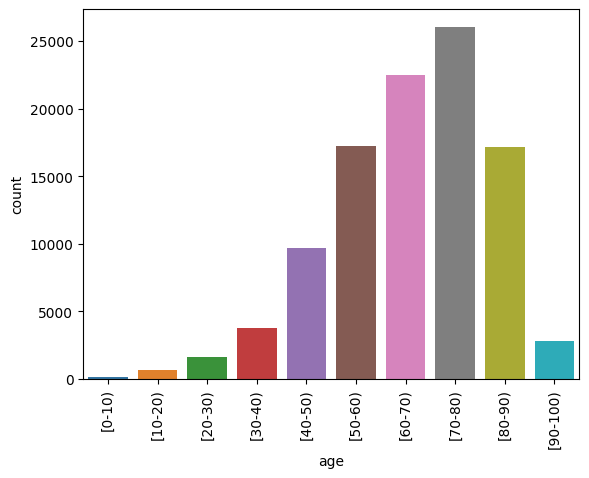

In [63]:
sns.countplot(x="age", data = df)
plt.xticks(rotation = 90)
plt.show()

/tmp/ipykernel_33/3425085283.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.age = df.age.replace({"[70-80)":75,


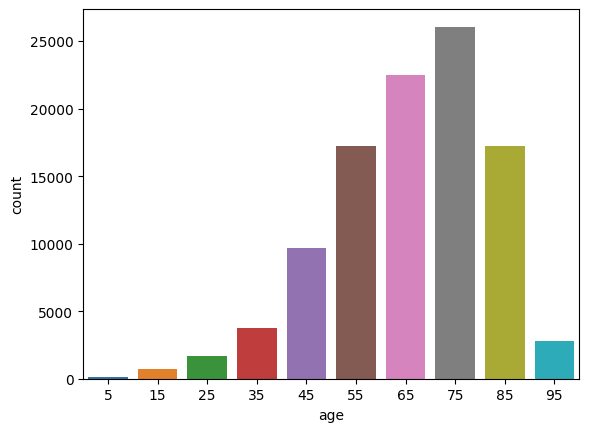

In [64]:
df.age = df.age.replace({"[70-80)":75,
                         "[60-70)":65,
                         "[50-60)":55,
                         "[80-90)":85,
                         "[40-50)":45,
                         "[30-40)":35,
                         "[90-100)":95,
                         "[20-30)":25,
                         "[10-20)":15,
                         "[0-10)":5})

sns.countplot(x="age", data = df)
plt.show()

Distribution of ID's
admission_type_id
1    53988
3    18868
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: count, dtype: int64


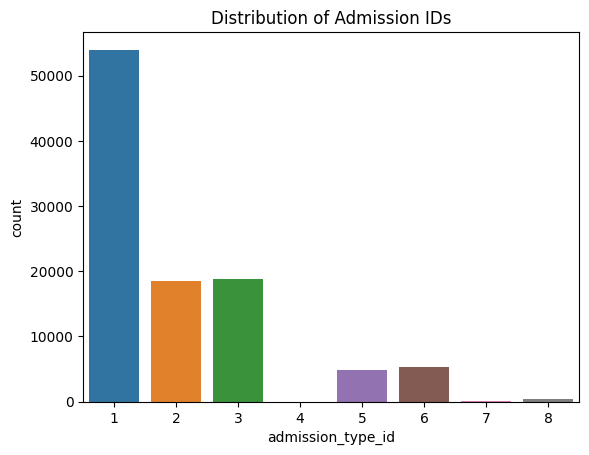

In [65]:
print("Distribution of ID's")
print(df.admission_type_id.value_counts())

sns.countplot(x = "admission_type_id", data = df)
plt.title("Distribution of Admission IDs")
plt.show()

-Distribution of ID's-
admission_type_id
Emergency        72468
Elective         18868
Trauma Center       21
New Born            10
Name: count, dtype: int64


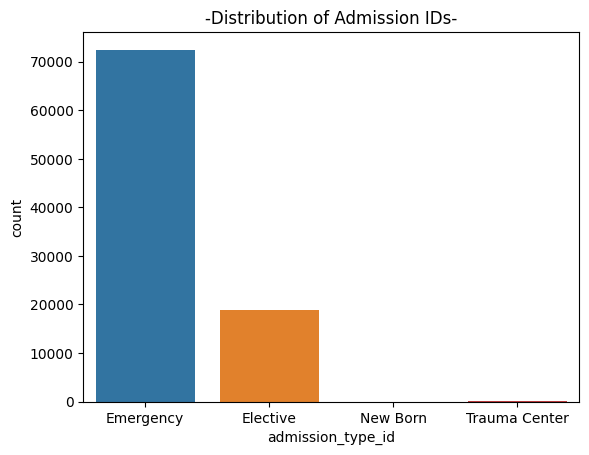

In [66]:
# Create a mapping of admission type IDs to their corresponding categories
mapped = {
    1.0: "Emergency",
    2.0: "Emergency",
    3.0: "Elective",
    4.0: "New Born",
    5.0: np.nan,
    6.0: np.nan,
    7.0: "Trauma Center",
    8.0: np.nan
}

# Replace admission_type_id values with their mapped categories
df.admission_type_id = df.admission_type_id.replace(mapped)
print("-Distribution of ID's-")
print(df.admission_type_id.value_counts())
sns.countplot(x="admission_type_id", data=df)
plt.title("-Distribution of Admission IDs-")
plt.show()


In [67]:
mapped_discharge = {1:"Discharged to Home",
                    6:"Discharged to Home",
                    8:"Discharged to Home",
                    13:"Discharged to Home",
                    19:"Discharged to Home",
                    18:np.nan,25:np.nan,26:np.nan,
                    2:"Other",3:"Other",4:"Other",
                    5:"Other",7:"Other",9:"Other",
                    10:"Other",11:"Other",12:"Other",
                    14:"Other",15:"Other",16:"Other",
                    17:"Other",20:"Other",21:"Other",
                    22:"Other",23:"Other",24:"Other",
                    27:"Other",28:"Other",29:"Other",30:"Other"}

df["discharge_disposition_id"] = df["discharge_disposition_id"].replace(mapped_discharge)

In [68]:
df['discharge_disposition_id'].unique()

array([nan, 'Discharged to Home', 'Other'], dtype=object)

Proportions of ID's
discharge_disposition_id
Discharged to Home    73649
Other                 23434
Name: count, dtype: int64


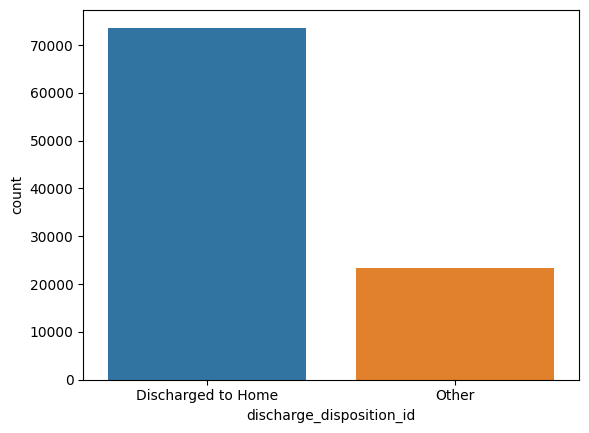

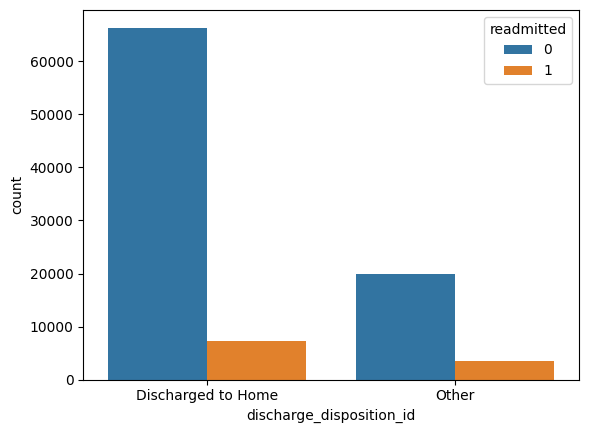

In [69]:
print("Proportions of ID's")
print(df.discharge_disposition_id.value_counts())

sns.countplot(x ="discharge_disposition_id", data = df)
plt.show()

sns.countplot(x ="discharge_disposition_id", hue = "readmitted", data = df)
plt.show()

admission_source_id
Emergency    57492
Referral     30855
Other         6474
Name: count, dtype: int64


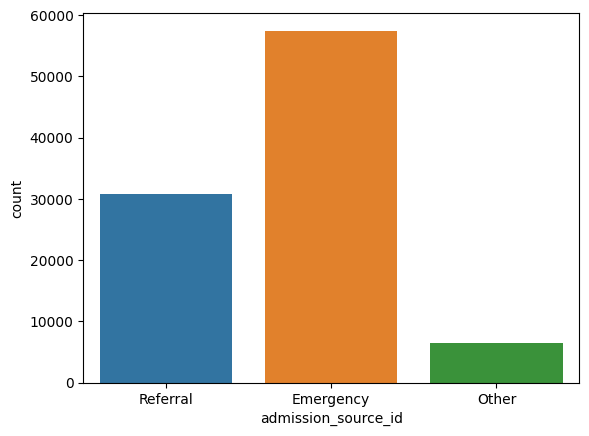

In [70]:
mapped_adm = {1:"Referral",2:"Referral",3:"Referral",
              4:"Other",5:"Other",6:"Other",10:"Other",22:"Other",25:"Other",
              9:"Other",8:"Other",14:"Other",13:"Other",11:"Other",
              15:np.nan,17:np.nan,20:np.nan,21:np.nan,
              7:"Emergency"}
df.admission_source_id = df.admission_source_id.replace(mapped_adm)
print(df.admission_source_id.value_counts())

sns.countplot(x = "admission_source_id", data = df)
plt.show()



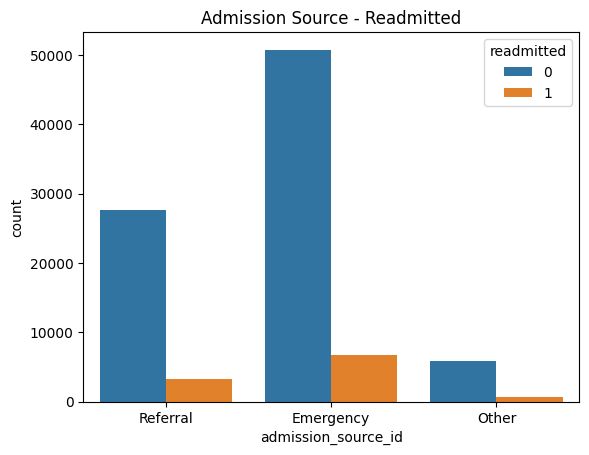

In [71]:
sns.countplot(x = "admission_source_id", hue = "readmitted", data = df)
plt.title("Admission Source - Readmitted")
plt.show()

time_in_hospital
3     17756
2     17224
1     14206
4     13924
5      9966
6      7539
7      5859
8      4390
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: count, dtype: int64


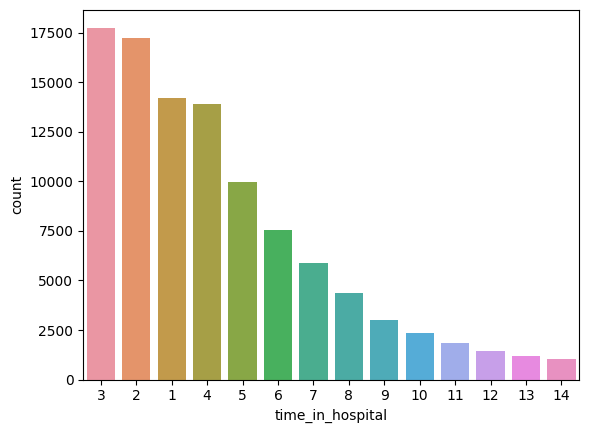

In [72]:
print(df.time_in_hospital.value_counts())

sns.countplot(x="time_in_hospital", data = df,
              order = df.time_in_hospital.value_counts().index)
plt.show()

In [73]:
df['race'] = df['race'].fillna(df['race'].mode()[0])

df['admission_type_id'] = df['admission_type_id'].fillna(df['admission_type_id'].mode()[0])

df['discharge_disposition_id'] = df['discharge_disposition_id'].fillna(df['discharge_disposition_id'].mode()[0])

df['admission_source_id'] = df['admission_source_id'].fillna(df['admission_source_id'].mode()[0])

In [74]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,Emergency,Discharged to Home,Referral,1,41,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,15,Emergency,Discharged to Home,Emergency,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,64410,86047875,AfricanAmerican,Female,25,Emergency,Discharged to Home,Emergency,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,35,Emergency,Discharged to Home,Emergency,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,45,Emergency,Discharged to Home,Emergency,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [75]:
cat_data = df.select_dtypes('O')
num_data = df.select_dtypes(np.number)

cat_data

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,Emergency,Discharged to Home,Referral,250.83,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,Emergency,Discharged to Home,Emergency,276,250.01,255,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,Emergency,Discharged to Home,Emergency,648,250,V27,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,Emergency,Discharged to Home,Emergency,8,250.43,403,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,Emergency,Discharged to Home,Emergency,197,157,250,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,Emergency,Other,Emergency,250.13,291,458,NaN,>8,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,Emergency,Other,Other,560,276,787,NaN,NaN,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,Emergency,Discharged to Home,Emergency,38,590,296,NaN,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,Emergency,Other,Emergency,996,285,998,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes


#Model Creation and Evaluation

In [76]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder
LE = LabelEncoder()

# Iterate through each column of categorical data in the Df
for i in cat_data:
    # Use the LabelEncoder to transform the values in the column to numerical labels
    cat_data[i] = LE.fit_transform(cat_data[i])


In [77]:
data = pd.concat([num_data,cat_data],axis=1)
data.head()
data['glipizide'].unique()

array([1, 2, 3, 0])

In [78]:
data.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)
data.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,5,1,41,0,1,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
1,15,3,59,0,18,0,0,0,9,0,...,0,0,3,1,0,0,0,0,0,1
2,25,2,11,5,13,2,0,1,6,0,...,0,0,1,1,0,0,0,0,1,1
3,35,2,44,1,16,0,0,0,7,0,...,0,0,3,1,0,0,0,0,0,1
4,45,1,51,0,8,0,0,0,5,0,...,0,0,2,1,0,0,0,0,0,1


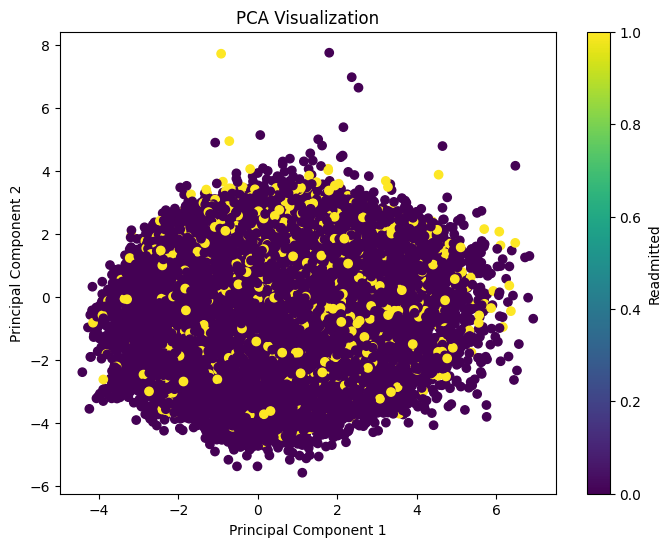

Explained variance ratio: [0.05713081 0.04805385]


In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Separate features and target variable
X = data.drop('readmitted', axis=1)  # Features
y = data['readmitted']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # You can adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Visualize the principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.colorbar(label='Readmitted')
plt.show()

# Percentage of variance explained by each principal component
print("Explained variance ratio:", pca.explained_variance_ratio_)


In [38]:
# Get the absolute values of the loadings (weights) of each feature on each principal component
abs_loadings = np.abs(pca.components_)

# Find the indices of the top features for each principal component
top_feature_indices = np.argsort(abs_loadings, axis=1)[:, ::-1]

# Get the original feature names
feature_names = data.columns[:-1]  # Exclude the target variable

# Print the names of the top features for each principal component
for i, component in enumerate(pca.components_):
    print(f"Principal Component {i + 1}:")
    top_features = [feature_names[j] for j in top_feature_indices[i]]
    print(top_features)
    print()


Principal Component 1:
['num_medications', 'metformin-pioglitazone', 'time_in_hospital', 'change', 'num_lab_procedures', 'number_diagnoses', 'num_procedures', 'A1Cresult', 'citoglipton', 'admission_type_id', 'tolbutamide', 'acetohexamide', 'pioglitazone', 'max_glu_serum', 'glipizide', 'chlorpropamide', 'age', 'metformin', 'diag_1', 'number_inpatient', 'number_outpatient', 'gender', 'diag_3', 'repaglinide', 'readmitted', 'rosiglitazone', 'number_emergency', 'admission_source_id', 'insulin', 'discharge_disposition_id', 'acarbose', 'glimepiride', 'glimepiride-pioglitazone', 'miglitol', 'glyburide-metformin', 'glipizide-metformin', 'glyburide', 'race', 'troglitazone', 'metformin-rosiglitazone', 'nateglinide', 'diag_2', 'examide', 'tolazamide']

Principal Component 2:
['discharge_disposition_id', 'gender', 'num_lab_procedures', 'number_diagnoses', 'admission_type_id', 'A1Cresult', 'age', 'time_in_hospital', 'change', 'metformin-pioglitazone', 'number_inpatient', 'num_procedures', 'pioglitaz

In [42]:
# Print the top features for PC1
print("Top Features for PC1:")
for feature in top_features_pc1:
    print(feature)


Top Features for PC1:
num_medications
metformin-pioglitazone
time_in_hospital
change
num_lab_procedures
number_diagnoses
num_procedures
A1Cresult
citoglipton
admission_type_id
tolbutamide
acetohexamide
pioglitazone
max_glu_serum
glipizide
chlorpropamide
age
metformin
diag_1
number_inpatient
number_outpatient
gender
diag_3
repaglinide
readmitted
rosiglitazone
number_emergency
admission_source_id
insulin
discharge_disposition_id
acarbose
glimepiride
glimepiride-pioglitazone
miglitol
glyburide-metformin
glipizide-metformin
glyburide
race
troglitazone
metformin-rosiglitazone
nateglinide
diag_2
examide
tolazamide


In [43]:
# Calculate the number of top features for PC1
num_top_features_pc1 = len(top_features_pc1)

# Print the number of top features for PC1
print("Number of Top Features for PC1:", num_top_features_pc1)


Number of Top Features for PC1: 44


In [79]:
# Save CSV file
data.to_csv('encoded_data.csv', index=False)

# download link for the CSV file
from IPython.display import FileLink
FileLink('encoded_data.csv')

/kaggle/working/encoded_data.csv

In [80]:
X = data.drop('readmitted',axis=1)

y = data['readmitted']

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [83]:
SC = StandardScaler()

X_train_scaled = pd.DataFrame(SC.fit_transform(X_train),columns=X_train.columns)

X_test_scaled = pd.DataFrame(SC.transform(X_test),columns=X_test.columns)

In [84]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((81410, 44), (20353, 44), (81410,), (20353,))

Imbalance data

In [85]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# random undersampling
undersampler = RandomUnderSampler(random_state=1)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train_scaled, y_train)

#  oversampling using SMOTE
smote = SMOTE(random_state=1)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_scaled, y_train)

print("Shape of undersampled data:", X_train_undersampled.shape, y_train_undersampled.shape)
print("Shape of oversampled data:", X_train_oversampled.shape, y_train_oversampled.shape)


Shape of undersampled data: (18208, 44) (18208,)
Shape of oversampled data: (144612, 44) (144612,)


In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, roc_curve, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

2024-03-18 07:37:22.428186: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-18 07:37:22.428333: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-18 07:37:22.614602: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


XGBoost

In [43]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier()

# Train and evaluate on original dataset
xgb_classifier.fit(X_train_scaled, y_train)
y_pred_original = xgb_classifier.predict(X_test_scaled)

accuracy_original = accuracy_score(y_test, y_pred_original)
precision_original = precision_score(y_test, y_pred_original)
recall_original = recall_score(y_test, y_pred_original)
f1_original = f1_score(y_test, y_pred_original)

conf_matrix_original = confusion_matrix(y_test, y_pred_original)
class_report_original = classification_report(y_test, y_pred_original)

print("Original Dataset:")
print("Accuracy:", accuracy_original)
print("Precision:", precision_original)
print("Recall:", recall_original)
print("F1 Score:", f1_original)
print("Confusion Matrix:")
print(conf_matrix_original)
print("Classification Report:")
print(class_report_original)

# Train and evaluate on oversampled dataset
xgb_classifier.fit(X_train_oversampled, y_train_oversampled)
y_pred_oversampled = xgb_classifier.predict(X_test_scaled)

accuracy_oversampled = accuracy_score(y_test, y_pred_oversampled)
precision_oversampled = precision_score(y_test, y_pred_oversampled)
recall_oversampled = recall_score(y_test, y_pred_oversampled)
f1_oversampled = f1_score(y_test, y_pred_oversampled)

conf_matrix_oversampled = confusion_matrix(y_test, y_pred_oversampled)
class_report_oversampled = classification_report(y_test, y_pred_oversampled)

print("Oversampled Dataset:")
print("Accuracy:", accuracy_oversampled)
print("Precision:", precision_oversampled)
print("Recall:", recall_oversampled)
print("F1 Score:", f1_oversampled)
print("Confusion Matrix:")
print(conf_matrix_oversampled)
print("Classification Report:")
print(class_report_oversampled)

# Train and evaluate on undersampled dataset
xgb_classifier.fit(X_train_undersampled, y_train_undersampled)
y_pred_undersampled = xgb_classifier.predict(X_test_scaled)

accuracy_undersampled = accuracy_score(y_test, y_pred_undersampled)
precision_undersampled = precision_score(y_test, y_pred_undersampled)
recall_undersampled = recall_score(y_test, y_pred_undersampled)
f1_undersampled = f1_score(y_test, y_pred_undersampled)

conf_matrix_undersampled = confusion_matrix(y_test, y_pred_undersampled)
class_report_undersampled = classification_report(y_test, y_pred_undersampled)

print("Undersampled Dataset:")
print("Accuracy:", accuracy_undersampled)
print("Precision:", precision_undersampled)
print("Recall:", recall_undersampled)
print("F1 Score:", f1_undersampled)
print("Confusion Matrix:")
print(conf_matrix_undersampled)
print("Classification Report:")
print(class_report_undersampled)


Original Dataset:
Accuracy: 0.8874858743182823
Precision: 0.36496350364963503
Recall: 0.022192632046160676
F1 Score: 0.041841004184100423
Confusion Matrix:
[[18013    87]
 [ 2203    50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18100
           1       0.36      0.02      0.04      2253

    accuracy                           0.89     20353
   macro avg       0.63      0.51      0.49     20353
weighted avg       0.83      0.89      0.84     20353

Oversampled Dataset:
Accuracy: 0.8878789367660788
Precision: 0.4013605442176871
Recall: 0.026187305814469597
F1 Score: 0.04916666666666667
Confusion Matrix:
[[18012    88]
 [ 2194    59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18100
           1       0.40      0.03      0.05      2253

    accuracy                           0.89     20353
   macro avg       0.65      0.51 

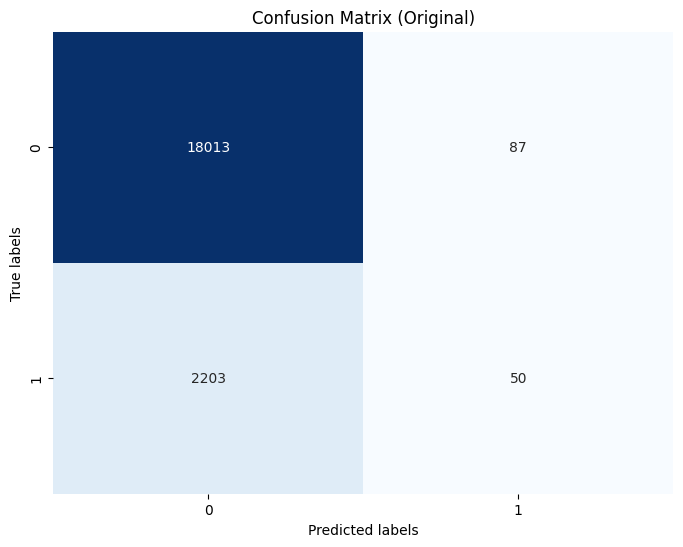

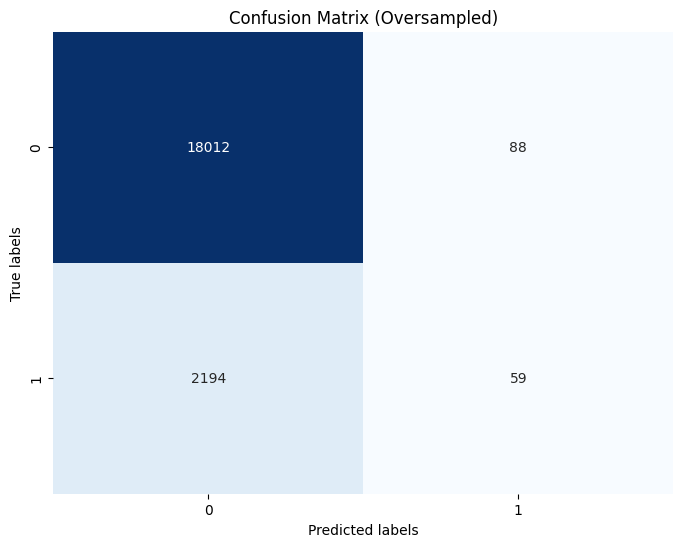

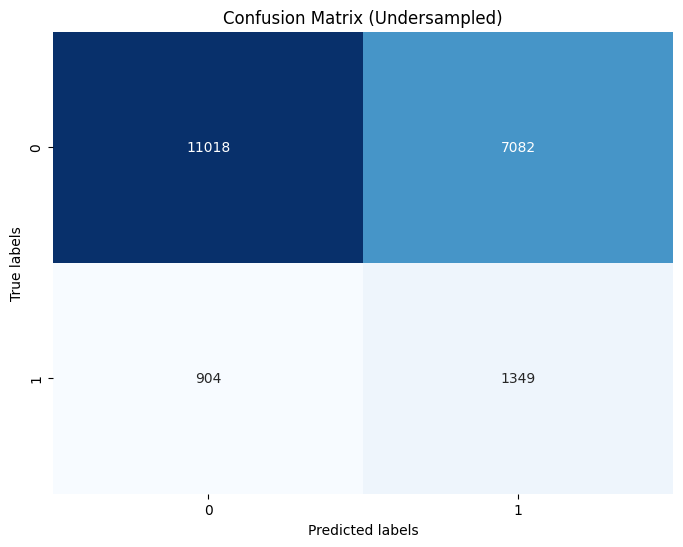

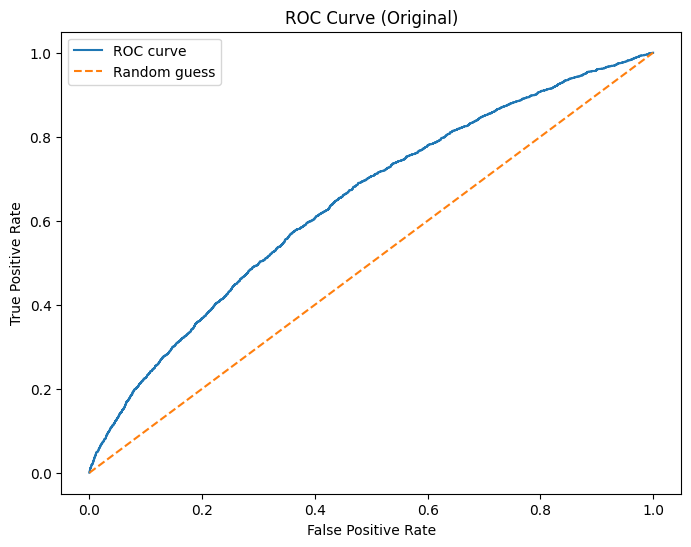

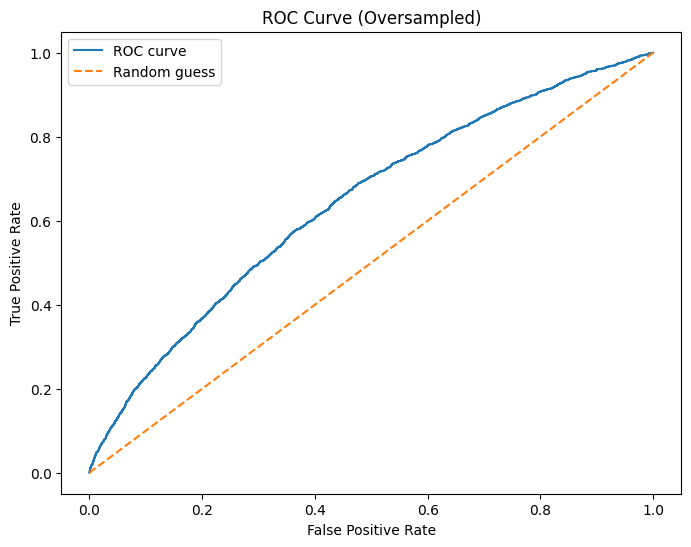

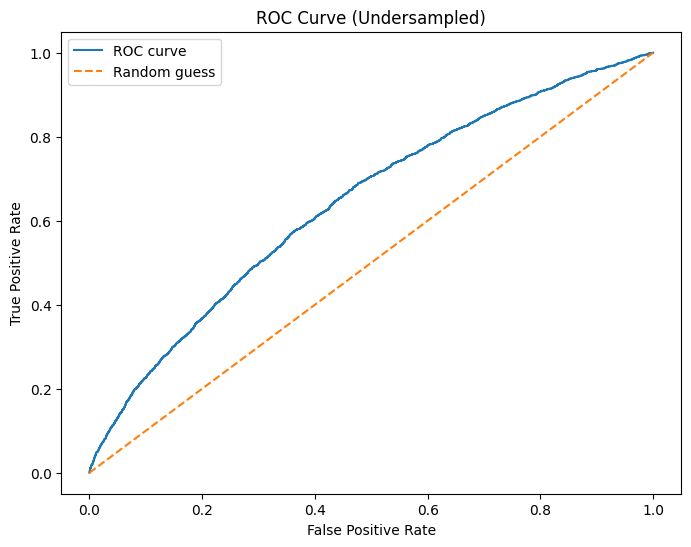

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.show()

# Plot confusion matrix for original dataset
plot_confusion_matrix(conf_matrix_original, "Confusion Matrix (Original)")

# Plot confusion matrix for oversampled dataset
plot_confusion_matrix(conf_matrix_oversampled, "Confusion Matrix (Oversampled)")

# Plot confusion matrix for undersampled dataset
plot_confusion_matrix(conf_matrix_undersampled, "Confusion Matrix (Undersampled)")

# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred_probs, title):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label="ROC curve")
    plt.plot([0, 1], [0, 1], linestyle="--", label="Random guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend()
    plt.show()

# Calculate predicted probabilities for each dataset
y_pred_probs_original = xgb_classifier.predict_proba(X_test_scaled)[:, 1]
y_pred_probs_oversampled = xgb_classifier.predict_proba(X_test_scaled)[:, 1]
y_pred_probs_undersampled = xgb_classifier.predict_proba(X_test_scaled)[:, 1]

# Plot ROC curve for original dataset
plot_roc_curve(y_test, y_pred_probs_original, "ROC Curve (Original)")

# Plot ROC curve for oversampled dataset
plot_roc_curve(y_test, y_pred_probs_oversampled, "ROC Curve (Oversampled)")

# Plot ROC curve for undersampled dataset
plot_roc_curve(y_test, y_pred_probs_undersampled, "ROC Curve (Undersampled)")


In [42]:
# Logistic Regression models
LR_original = LogisticRegression(random_state=1)
LR_oversampled = LogisticRegression(random_state=1)
LR_undersampled = LogisticRegression(random_state=1)

LR_original.fit(X_train_scaled, y_train)
LR_oversampled.fit(X_train_oversampled, y_train_oversampled)
LR_undersampled.fit(X_train_undersampled, y_train_undersampled)

# Calculate training set
accuracy_original_train = LR_original.score(X_train_scaled, y_train)
accuracy_oversampled_train = LR_oversampled.score(X_train_oversampled, y_train_oversampled)
accuracy_undersampled_train = LR_undersampled.score(X_train_undersampled, y_train_undersampled)

print("Accuracy on original training set:", accuracy_original_train)
print("Accuracy on oversampled training set:", accuracy_oversampled_train)
print("Accuracy on undersampled training set:", accuracy_undersampled_train)


Accuracy on original training set: 0.888134135855546
Accuracy on oversampled training set: 0.6020247282383204
Accuracy on undersampled training set: 0.6063268892794376


In [43]:
LR = LogisticRegression()
LR.fit(X_train_scaled, y_train)

# accuracy the original test set
original_score = LR.score(X_test_scaled, y_test)
print("Accuracy score on original test set:", original_score)

# Fit the model on the oversampled training data
LR.fit(X_train_oversampled, y_train_oversampled)

# accuracy on the oversampled test set
oversampled_score = LR.score(X_test_scaled, y_test)
print("Accuracy score on oversampled test set:", oversampled_score)

LR.fit(X_train_undersampled, y_train_undersampled)
undersampled_score = LR.score(X_test_scaled, y_test)
print("Accuracy score on undersampled test set:", undersampled_score)


Accuracy score on original test set: 0.8882719992138751
Accuracy score on oversampled test set: 0.6407900555200707
Accuracy score on undersampled test set: 0.6550877020586646


Evaluation on original test set:
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.67      0.78     18100
           1       0.17      0.53      0.25      2253

    accuracy                           0.66     20353
   macro avg       0.54      0.60      0.52     20353
weighted avg       0.84      0.66      0.72     20353



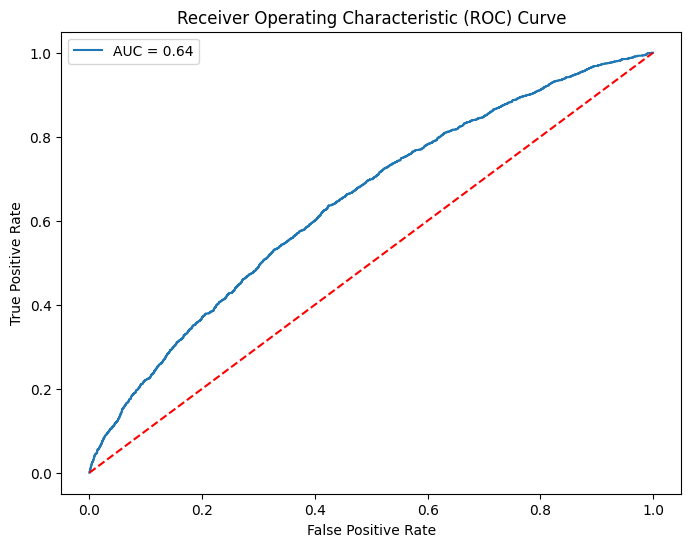

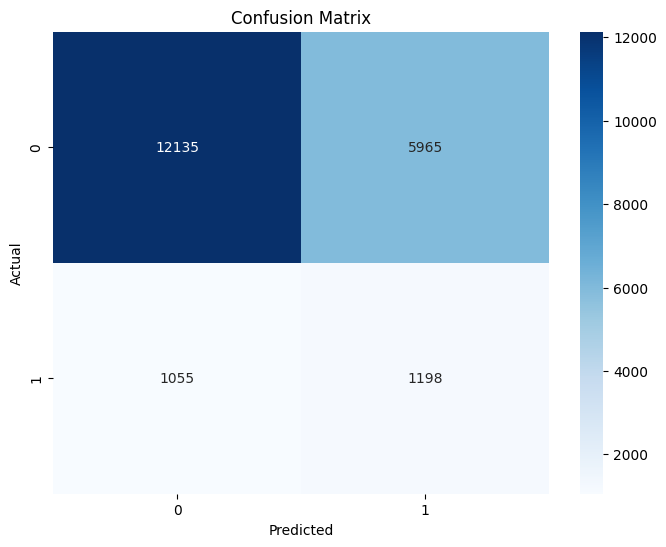

Evaluation on oversampled test set:
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.67      0.78     18100
           1       0.17      0.53      0.25      2253

    accuracy                           0.66     20353
   macro avg       0.54      0.60      0.52     20353
weighted avg       0.84      0.66      0.72     20353



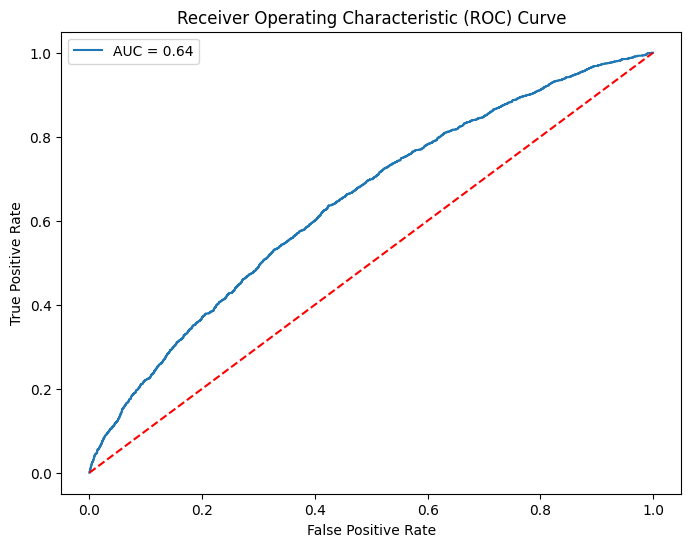

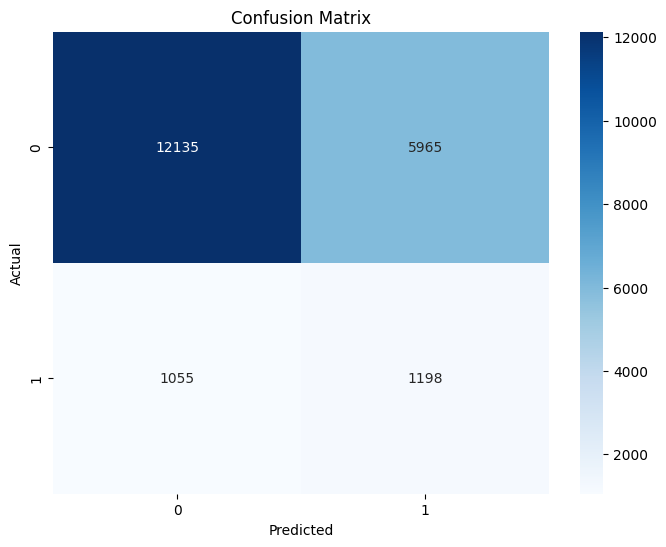

Evaluation on undersampled test set:
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.67      0.78     18100
           1       0.17      0.53      0.25      2253

    accuracy                           0.66     20353
   macro avg       0.54      0.60      0.52     20353
weighted avg       0.84      0.66      0.72     20353



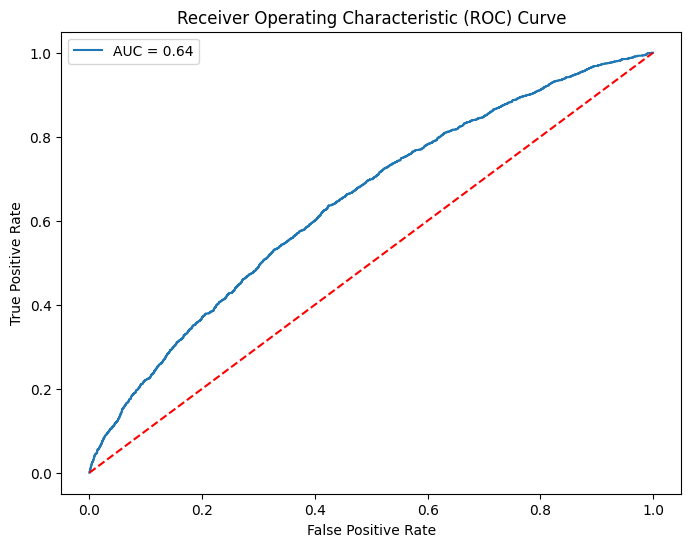

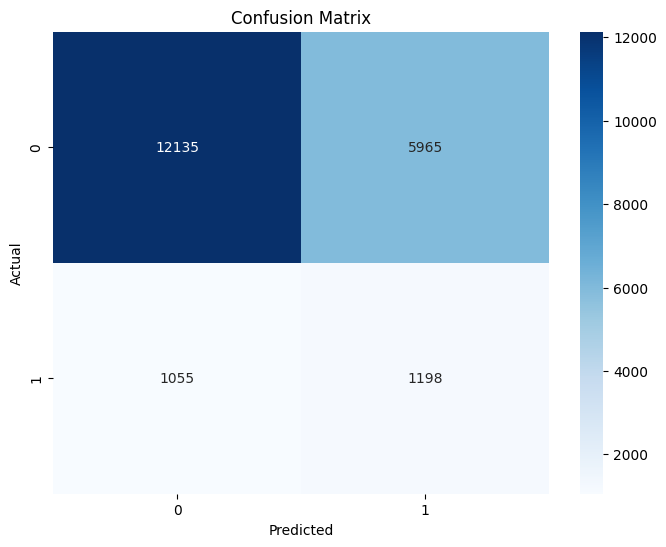

In [44]:
# valuate the model 
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)
  
    y_proba = model.predict_proba(X_test)[:, 1]  
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
    #Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

print("Evaluation on original test set:")
evaluate_model(LR, X_test_scaled, y_test)
print("Evaluation on oversampled test set:")
evaluate_model(LR, X_test_scaled, y_test)
print("Evaluation on undersampled test set:")
evaluate_model(LR, X_test_scaled, y_test)


# Random Forest


In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train the Random Forest classifiers
rf_original = RandomForestClassifier(random_state=1)
rf_original.fit(X_train_scaled, y_train)

rf_undersampled = RandomForestClassifier(random_state=1)
rf_undersampled.fit(X_train_undersampled, y_train_undersampled)

rf_oversampled = RandomForestClassifier(random_state=1)
rf_oversampled.fit(X_train_oversampled, y_train_oversampled)

# Predictions on the original test set
y_pred_original = rf_original.predict(X_test_scaled)
accuracy_original = accuracy_score(y_test, y_pred_original)
print("Accuracy on original test set:", accuracy_original)

# Predictions on the undersampled test set
y_pred_undersampled = rf_undersampled.predict(X_test_scaled)
accuracy_undersampled = accuracy_score(y_test, y_pred_undersampled)
print("Accuracy on undersampled test set:", accuracy_undersampled)

# Predictions on the oversampled test set
y_pred_oversampled = rf_oversampled.predict(X_test_scaled)
accuracy_oversampled = accuracy_score(y_test, y_pred_oversampled)
print("Accuracy on oversampled test set:", accuracy_oversampled)


Accuracy on original test set: 0.8892055225273915
Accuracy on undersampled test set: 0.6184346288016509
Accuracy on oversampled test set: 0.8872402102884096


In [93]:
from sklearn.metrics import classification_report

# Classification report for the original test set
print("Classification Report - Original Test Set:")
print(classification_report(y_test, y_pred_original))

# Classification report for the undersampled test set
print("Classification Report - Undersampled Test Set:")
print(classification_report(y_test, y_pred_undersampled))

# Classification report for the oversampled test set
print("Classification Report - Oversampled Test Set:")
print(classification_report(y_test, y_pred_oversampled))


Classification Report - Original Test Set:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18100
           1       0.48      0.01      0.02      2253

    accuracy                           0.89     20353
   macro avg       0.69      0.50      0.48     20353
weighted avg       0.84      0.89      0.84     20353

Classification Report - Undersampled Test Set:
              precision    recall  f1-score   support

           0       0.93      0.62      0.74     18100
           1       0.17      0.60      0.26      2253

    accuracy                           0.62     20353
   macro avg       0.55      0.61      0.50     20353
weighted avg       0.84      0.62      0.69     20353

Classification Report - Oversampled Test Set:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18100
           1       0.33      0.02      0.04      2253

    accuracy                           0.89   

In [43]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

# Train Random Forest on original training set
RF.fit(X_train_scaled, y_train)
original_accuracy_RF_train = RF.score(X_train_scaled, y_train)
print("Accuracy score on original training set (Random Forest):", original_accuracy_RF_train)

# Train Random Forest on oversampled training set
RF.fit(X_train_oversampled, y_train_oversampled)
oversampled_accuracy_RF_train = RF.score(X_train_oversampled, y_train_oversampled)
print("Accuracy score on oversampled training set (Random Forest):", oversampled_accuracy_RF_train)

# Train Random Forest on undersampled training set
RF.fit(X_train_undersampled, y_train_undersampled)
undersampled_accuracy_RF_train = RF.score(X_train_undersampled, y_train_undersampled)
print("Accuracy score on undersampled training set (Random Forest):", undersampled_accuracy_RF_train)


Accuracy score on original training set (Random Forest): 0.9999754329934898
Accuracy score on oversampled training set (Random Forest): 1.0
Accuracy score on undersampled training set (Random Forest): 1.0


Evaluation on original test set:
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.62      0.74     18100
           1       0.16      0.59      0.25      2253

    accuracy                           0.62     20353
   macro avg       0.54      0.61      0.50     20353
weighted avg       0.84      0.62      0.69     20353



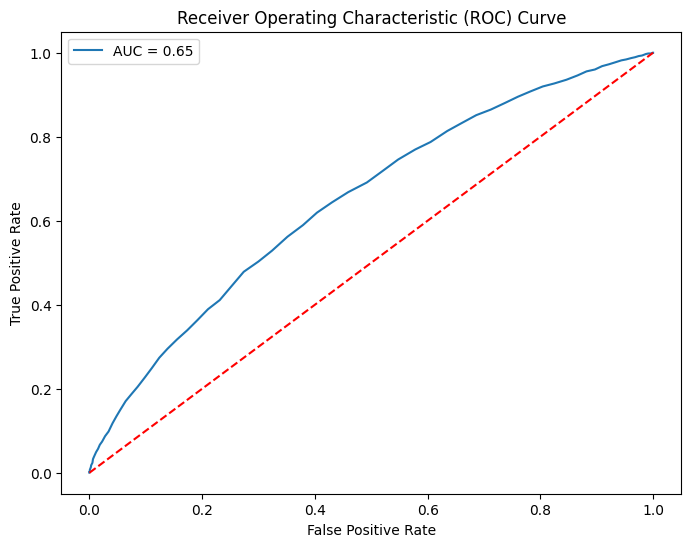

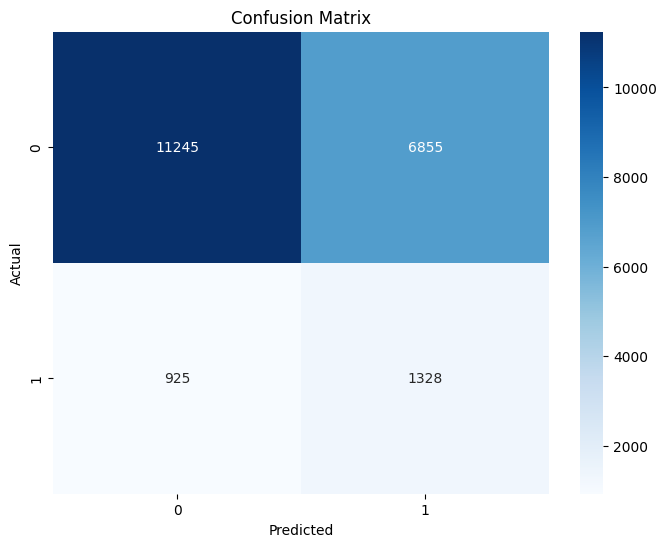

Evaluation on oversampled test set:
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.62      0.74     18100
           1       0.16      0.59      0.25      2253

    accuracy                           0.62     20353
   macro avg       0.54      0.61      0.50     20353
weighted avg       0.84      0.62      0.69     20353



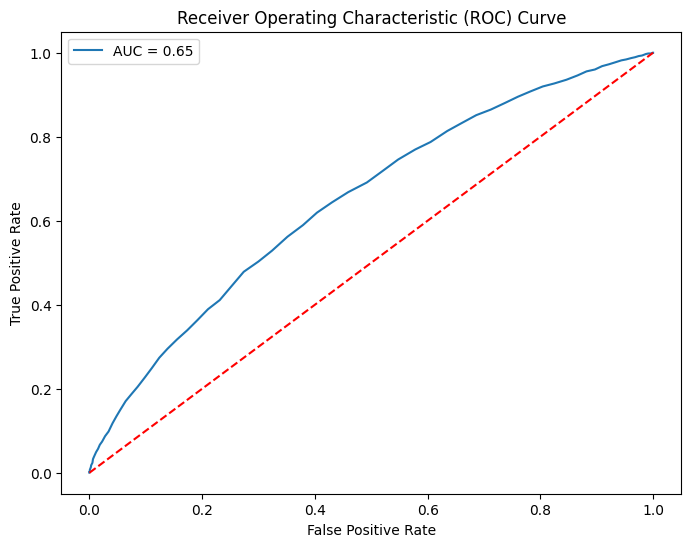

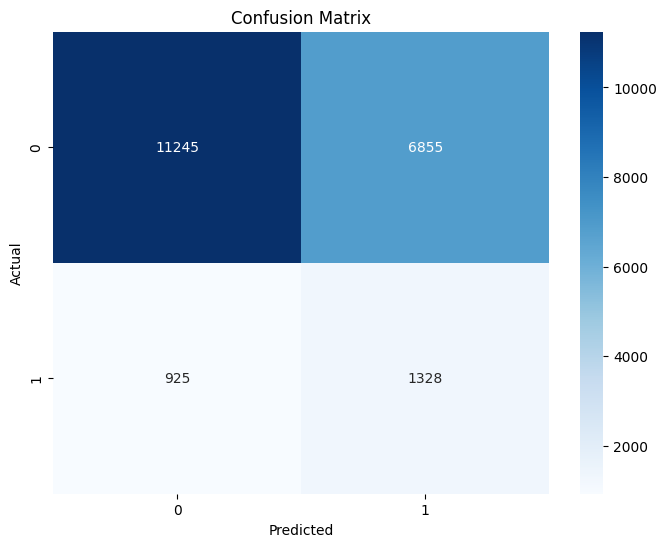

Evaluation on undersampled test set:
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.62      0.74     18100
           1       0.16      0.59      0.25      2253

    accuracy                           0.62     20353
   macro avg       0.54      0.61      0.50     20353
weighted avg       0.84      0.62      0.69     20353



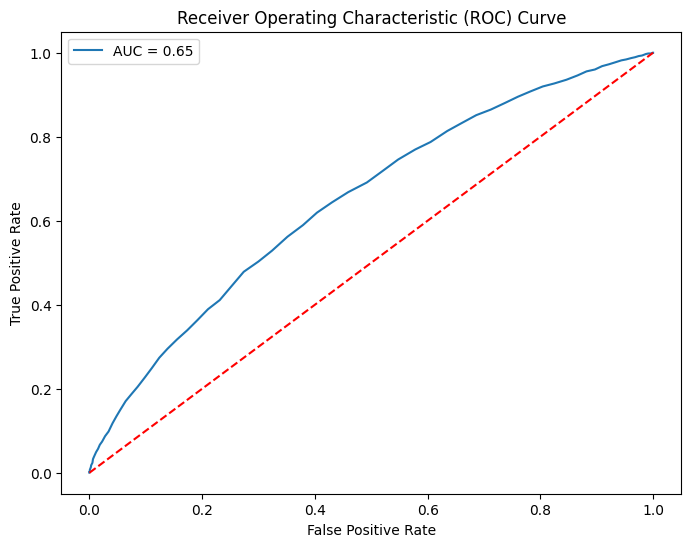

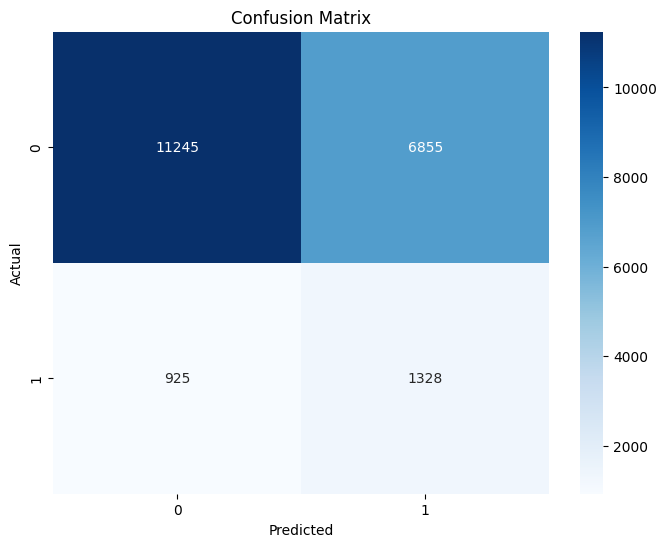

In [54]:
# evaluate model 
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)
    
    # ROC curve and AUC score
    y_proba = model.predict_proba(X_test)[:, 1]  
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

print("Evaluation on original test set:")
evaluate_model(RF, X_test_scaled, y_test)
print("Evaluation on oversampled test set:")
evaluate_model(RF, X_test_scaled, y_test)
print("Evaluation on undersampled test set:")
evaluate_model(RF, X_test_scaled, y_test)


# neural network model

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_nn_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),  # Correct input_shape format
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    return model

input_shape = X_train_scaled.shape[1]  # Number of features
nn_model = create_nn_model(input_shape)
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,993 (19.50 KB)

 Trainable params: 4,993 (19.50 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Define the neural network model
nn_model = create_nn_model(input_shape)

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)
original_accuracy_nn_train = nn_model.evaluate(X_train_scaled, y_train, verbose=0)[1]
print("Accuracy score on original training set (Neural Network):", original_accuracy_nn_train)


nn_model.fit(X_train_oversampled, y_train_oversampled, epochs=10, batch_size=32, verbose=1)
oversampled_accuracy_nn_train = nn_model.evaluate(X_train_oversampled, y_train_oversampled, verbose=0)[1]
print("Accuracy score on oversampled training set (Neural Network):", oversampled_accuracy_nn_train)

# Fit the model on the undersampled
nn_model.fit(X_train_undersampled, y_train_undersampled, epochs=10, batch_size=32, verbose=1)
undersampled_accuracy_nn_train = nn_model.evaluate(X_train_undersampled, y_train_undersampled, verbose=0)[1]
print("Accuracy score on undersampled training set (Neural Network):", undersampled_accuracy_nn_train)


Epoch 1/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8764 - loss: 0.3731
Epoch 2/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8881 - loss: 0.3410
Epoch 3/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8878 - loss: 0.3407
Epoch 4/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8874 - loss: 0.3378
Epoch 5/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8860 - loss: 0.3379
Epoch 6/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8890 - loss: 0.3341
Epoch 7/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8861 - loss: 0.3374
Epoch 8/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8876 - loss: 0.3346
Epoch 9/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8865 - loss: 0.3366
Epoch 10/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8880 - loss: 0.3339
Accuracy score on original training set (Neural Network): 0.8888588547706604
Epoch 1/10
4520/4520 ━━━━━━━━━━━━━━━━━━━━ 

2545/2545 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
4520/4520 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
569/569 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Classification Report (Original Dataset):
              precision    recall  f1-score   support

           0       0.93      0.71      0.80     72306
           1       0.20      0.59      0.30      9104

    accuracy                           0.69     81410
   macro avg       0.57      0.65      0.55     81410
weighted avg       0.85      0.69      0.75     81410

Classification Report (Oversampled Dataset):
              precision    recall  f1-score   support

           0       0.70      0.71      0.70     72306
           1       0.70      0.69      0.70     72306

    accuracy                           0.70    144612
   macro avg       0.70      0.70      0.70    144612
weighted avg       0.70      0.70      0.70    144612

Classification Report (Undersampled Dataset):
              precision    recall  f1-score   support

           0       0.65      0.

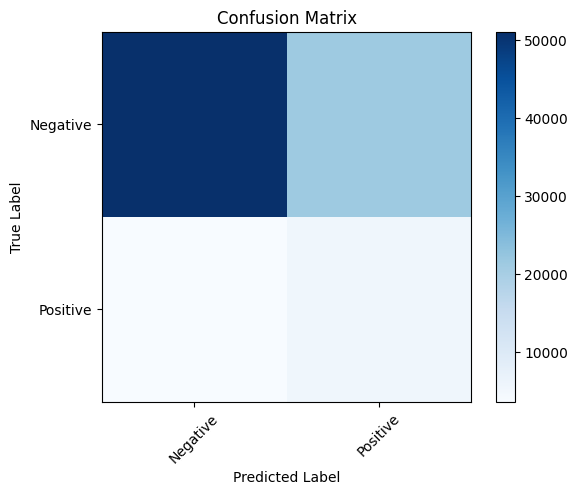

Confusion Matrix (Oversampled Dataset):
[[51005 21301]
 [22347 49959]]


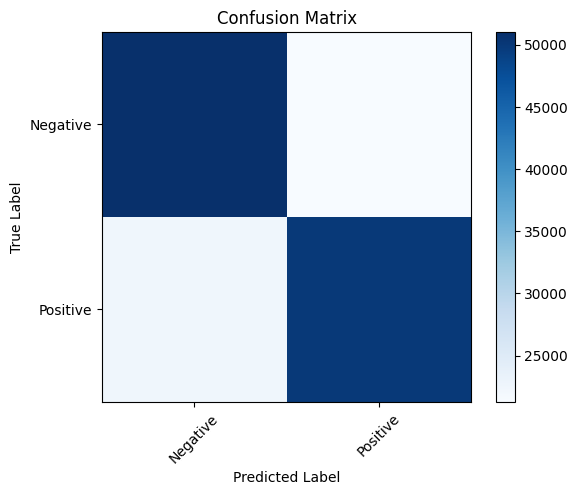

Confusion Matrix (Undersampled Dataset):
[[6841 2263]
 [3693 5411]]


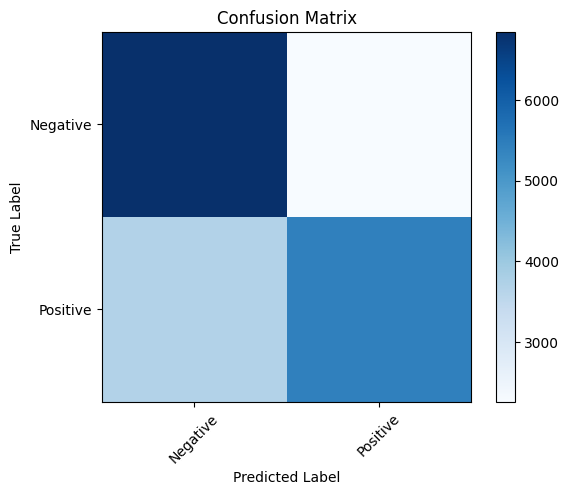

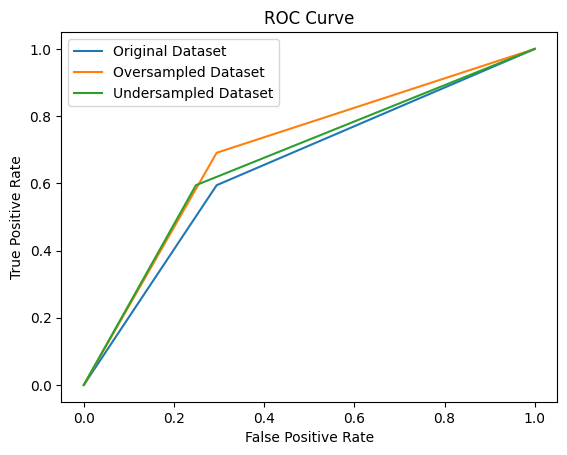

ROC AUC Score (Original Dataset): 0.6498794686996395
ROC AUC Score (Oversampled Dataset): 0.6981716593367079
ROC AUC Score (Undersampled Dataset): 0.6728910369068543


In [47]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predictions on original dataset
original_predictions = nn_model.predict(X_train_scaled)
original_predictions = (original_predictions > 0.5).astype(int)

# Predictions on oversampled dataset
oversampled_predictions = nn_model.predict(X_train_oversampled)
oversampled_predictions = (oversampled_predictions > 0.5).astype(int)

# Predictions on undersampled dataset
undersampled_predictions = nn_model.predict(X_train_undersampled)
undersampled_predictions = (undersampled_predictions > 0.5).astype(int)

# Classification report
print("Classification Report (Original Dataset):")
print(classification_report(y_train, original_predictions))

print("Classification Report (Oversampled Dataset):")
print(classification_report(y_train_oversampled, oversampled_predictions))

print("Classification Report (Undersampled Dataset):")
print(classification_report(y_train_undersampled, undersampled_predictions))

# Confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = [i for i in range(len(labels))]
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

cm_original = confusion_matrix(y_train, original_predictions)
cm_oversampled = confusion_matrix(y_train_oversampled, oversampled_predictions)
cm_undersampled = confusion_matrix(y_train_undersampled, undersampled_predictions)

print("Confusion Matrix (Original Dataset):")
print(cm_original)
plot_confusion_matrix(cm_original, ['Negative', 'Positive'])

print("Confusion Matrix (Oversampled Dataset):")
print(cm_oversampled)
plot_confusion_matrix(cm_oversampled, ['Negative', 'Positive'])

print("Confusion Matrix (Undersampled Dataset):")
print(cm_undersampled)
plot_confusion_matrix(cm_undersampled, ['Negative', 'Positive'])

# ROC curve
fpr_original, tpr_original, thresholds_original = roc_curve(y_train, original_predictions)
fpr_oversampled, tpr_oversampled, thresholds_oversampled = roc_curve(y_train_oversampled, oversampled_predictions)
fpr_undersampled, tpr_undersampled, thresholds_undersampled = roc_curve(y_train_undersampled, undersampled_predictions)

plt.plot(fpr_original, tpr_original, label='Original Dataset')
plt.plot(fpr_oversampled, tpr_oversampled, label='Oversampled Dataset')
plt.plot(fpr_undersampled, tpr_undersampled, label='Undersampled Dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# ROC AUC score
roc_auc_original = roc_auc_score(y_train, original_predictions)
roc_auc_oversampled = roc_auc_score(y_train_oversampled, oversampled_predictions)
roc_auc_undersampled = roc_auc_score(y_train_undersampled, undersampled_predictions)

print("ROC AUC Score (Original Dataset):", roc_auc_original)
print("ROC AUC Score (Oversampled Dataset):", roc_auc_oversampled)
print("ROC AUC Score (Undersampled Dataset):", roc_auc_undersampled)


In [51]:
!pip install scikeras
from scikeras.wrappers import KerasClassifier

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [63]:
class NNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, activation='relu'):
        self.activation = activation
    
    def fit(self, X, y):
        return self
    
    def predict(self, X):
        # Your prediction logic here
        pass


lstm

In [43]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense


def create_lstm_conv_model(input_shape, filters=32, kernel_size=3, pool_size=2, lstm_units=100):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(LSTM(units=lstm_units))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

 
input_shape = (X_train_scaled.shape[1], 1) 

X_train_scaled_array = X_train_scaled.to_numpy().reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled_array = X_test_scaled.to_numpy().reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)
X_train_oversampled_array = X_train_oversampled.to_numpy().reshape(X_train_oversampled.shape[0], X_train_oversampled.shape[1], 1)
X_train_undersampled_array = X_train_undersampled.to_numpy().reshape(X_train_undersampled.shape[0], X_train_undersampled.shape[1], 1)
y_train_oversampled_array = y_train_oversampled.to_numpy().reshape(-1, 1)
y_train_undersampled_array = y_train_undersampled.to_numpy().reshape(-1, 1)

lstm_conv_model = create_lstm_conv_model(input_shape)

lstm_conv_model.fit(X_train_scaled_array, y_train, epochs=10, batch_size=32, verbose=1)
accuracy_original = lstm_conv_model.evaluate(X_test_scaled_array, y_test)[1]
print("Accuracy on original test set:", accuracy_original)
lstm_conv_model.fit(X_train_oversampled_array, y_train_oversampled_array, epochs=10, batch_size=32, verbose=1)
accuracy_oversampled = lstm_conv_model.evaluate(X_test_scaled_array, y_test)[1]
print("Accuracy on oversampled test set:", accuracy_oversampled)

lstm_conv_model.fit(X_train_undersampled_array, y_train_undersampled_array, epochs=10, batch_size=32, verbose=1)
accuracy_undersampled = lstm_conv_model.evaluate(X_test_scaled_array, y_test)[1]
print("Accuracy on undersampled test set:", accuracy_undersampled)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.8872 - loss: 0.3541
Epoch 2/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.8883 - loss: 0.3454
Epoch 3/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8860 - loss: 0.3474
Epoch 4/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.8880 - loss: 0.3402
Epoch 5/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8877 - loss: 0.3385
Epoch 6/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.8891 - loss: 0.3365
Epoch 7/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.8921 - loss: 0.3276
Epoch 8/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.8883 - loss: 0.3348
Epoch 9/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8879 - loss: 0.3362
Epoch 10/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8897 - loss: 0.3309
637/637 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8853 - loss: 0.3402
Accuracy on original tes

637/637 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
637/637 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
637/637 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
Classification Report for original test set:
              precision    recall  f1-score   support

           0       0.91      0.63      0.74     18100
           1       0.14      0.51      0.23      2253

    accuracy                           0.61     20353
   macro avg       0.53      0.57      0.48     20353
weighted avg       0.83      0.61      0.68     20353

Classification Report for oversampled test set:
              precision    recall  f1-score   support

           0       0.91      0.63      0.74     18100
           1       0.14      0.51      0.23      2253

    accuracy                           0.61     20353
   macro avg       0.53      0.57      0.48     20353
weighted avg       0.83      0.61      0.68     20353

Classification Report for undersampled test set:
              precision    recall  f1-score   support

           0       0.91   

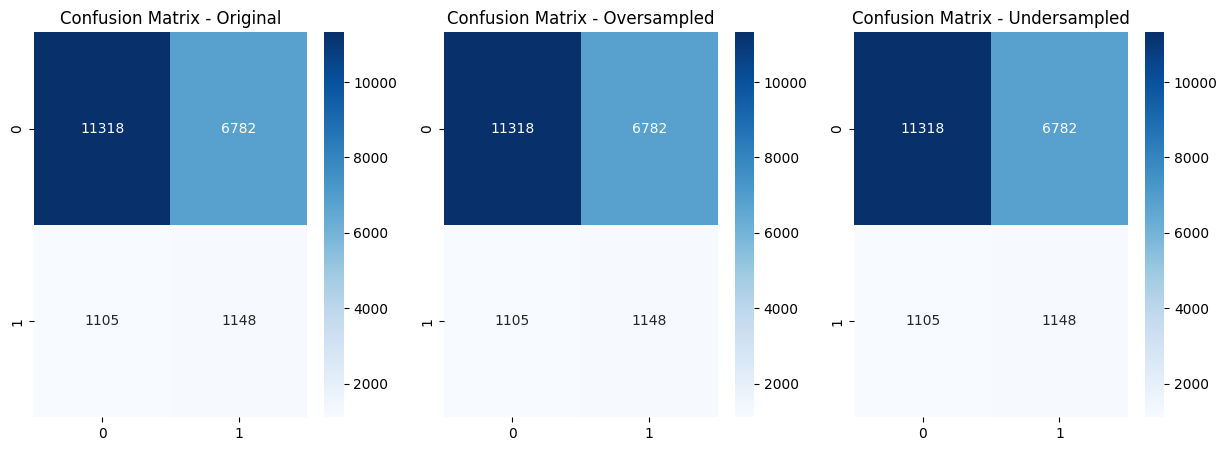

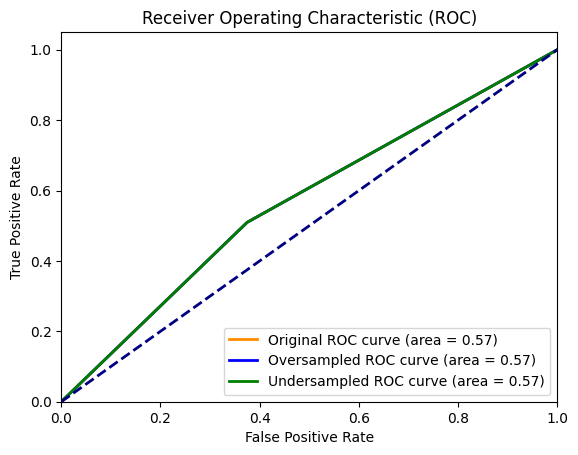

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions
y_pred_original = (lstm_conv_model.predict(X_test_scaled_array) > 0.5).astype("int32")
y_pred_oversampled = (lstm_conv_model.predict(X_test_scaled_array) > 0.5).astype("int32")
y_pred_undersampled = (lstm_conv_model.predict(X_test_scaled_array) > 0.5).astype("int32")

# Classification Report
print("Classification Report for original test set:")
print(classification_report(y_test, y_pred_original))

print("Classification Report for oversampled test set:")
print(classification_report(y_test, y_pred_oversampled))

print("Classification Report for undersampled test set:")
print(classification_report(y_test, y_pred_undersampled))

# Confusion Matrix
conf_matrix_original = confusion_matrix(y_test, y_pred_original)
conf_matrix_oversampled = confusion_matrix(y_test, y_pred_oversampled)
conf_matrix_undersampled = confusion_matrix(y_test, y_pred_undersampled)

# Plot Confusion Matrix
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_original, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Original')

plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_oversampled, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Oversampled')

plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix_undersampled, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Undersampled')

plt.show()

# ROC Curve
fpr_original, tpr_original, thresholds_original = roc_curve(y_test, y_pred_original)
roc_auc_original = roc_auc_score(y_test, y_pred_original)

fpr_oversampled, tpr_oversampled, thresholds_oversampled = roc_curve(y_test, y_pred_oversampled)
roc_auc_oversampled = roc_auc_score(y_test, y_pred_oversampled)

fpr_undersampled, tpr_undersampled, thresholds_undersampled = roc_curve(y_test, y_pred_undersampled)
roc_auc_undersampled = roc_auc_score(y_test, y_pred_undersampled)

# Plot ROC Curve
plt.figure()
plt.plot(fpr_original, tpr_original, color='darkorange', lw=2, label='Original ROC curve (area = %0.2f)' % roc_auc_original)
plt.plot(fpr_oversampled, tpr_oversampled, color='blue', lw=2, label='Oversampled ROC curve (area = %0.2f)' % roc_auc_oversampled)
plt.plot(fpr_undersampled, tpr_undersampled, color='green', lw=2, label='Undersampled ROC curve (area = %0.2f)' % roc_auc_undersampled)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



In [56]:
# Get the best accuracy and parameters for original dataset
best_accuracy_original = grid_search_original.best_score_
best_parameters_original = grid_search_original.best_params_

# Get the best accuracy and parameters for oversampled dataset
best_accuracy_oversampled = grid_search_oversampled.best_score_
best_parameters_oversampled = grid_search_oversampled.best_params_

# Get the best accuracy and parameters for undersampled dataset
best_accuracy_undersampled = grid_search_undersampled.best_score_
best_parameters_undersampled = grid_search_undersampled.best_params_

print("Best accuracy for original dataset:", best_accuracy_original)
print("Best parameters for original dataset:", best_parameters_original)

print("Best accuracy for oversampled dataset:", best_accuracy_oversampled)
print("Best parameters for oversampled dataset:", best_parameters_oversampled)

print("Best accuracy for undersampled dataset:", best_accuracy_undersampled)
print("Best parameters for undersampled dataset:", best_parameters_undersampled)


Best accuracy for original dataset: nan
Best parameters for original dataset: {'filters': 32, 'kernel_size': 3, 'lstm_units': 50, 'pool_size': 2}
Best accuracy for oversampled dataset: 0.6846043205266507
Best parameters for oversampled dataset: {'filters': 64, 'kernel_size': 5, 'lstm_units': 100, 'pool_size': 2}
Best accuracy for undersampled dataset: 0.23496316251086147
Best parameters for undersampled dataset: {'filters': 32, 'kernel_size': 5, 'lstm_units': 100, 'pool_size': 2}


LSMT other

In [47]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense

# Define  LSTM model function
def create_lstm_conv_model(input_shape, filters=32, kernel_size=3, pool_size=2, lstm_units=100):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(LSTM(units=lstm_units))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Define input shape 
input_shape = (X_train_scaled.shape[1], 1) 

# Convert DF to numpy arrays
X_train_scaled_array = X_train_scaled.to_numpy().reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled_array = X_test_scaled.to_numpy().reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)
X_train_oversampled_array = X_train_oversampled.to_numpy().reshape(X_train_oversampled.shape[0], X_train_oversampled.shape[1], 1)
X_train_undersampled_array = X_train_undersampled.to_numpy().reshape(X_train_undersampled.shape[0], X_train_undersampled.shape[1], 1)
y_train_oversampled_array = y_train_oversampled.to_numpy().reshape(-1, 1)
y_train_undersampled_array = y_train_undersampled.to_numpy().reshape(-1, 1)

# Create and compile  model with convolutional layer
lstm_conv_model = create_lstm_conv_model(input_shape)

lstm_conv_model.fit(X_train_scaled_array, y_train, epochs=10, batch_size=32, verbose=1)
accuracy_original = lstm_conv_model.evaluate(X_test_scaled_array, y_test)[1]
print("Accuracy on original test set:", accuracy_original)
lstm_conv_model.fit(X_train_oversampled_array, y_train_oversampled_array, epochs=10, batch_size=32, verbose=1)
accuracy_oversampled = lstm_conv_model.evaluate(X_test_scaled_array, y_test)[1]
print("Accuracy on oversampled test set:", accuracy_oversampled)

lstm_conv_model.fit(X_train_undersampled_array, y_train_undersampled_array, epochs=10, batch_size=32, verbose=1)
accuracy_undersampled = lstm_conv_model.evaluate(X_test_scaled_array, y_test)[1]
print("Accuracy on undersampled test set:", accuracy_undersampled)


Epoch 1/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.8857 - loss: 0.3579
Epoch 2/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - accuracy: 0.8869 - loss: 0.3502
Epoch 3/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.8872 - loss: 0.3448
Epoch 4/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8878 - loss: 0.3403
Epoch 5/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.8851 - loss: 0.3442
Epoch 6/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 80s 16ms/step - accuracy: 0.8884 - loss: 0.3378
Epoch 7/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8875 - loss: 0.3383
Epoch 8/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8868 - loss: 0.3374
Epoch 9/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8891 - loss: 0.3343
Epoch 10/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8872 - loss: 0.3371
637/637 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8863 - loss: 0.3395
Accuracy on original tes

637/637 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
637/637 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
637/637 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Classification Report on original test set:
              precision    recall  f1-score   support

           0       0.91      0.61      0.73     18100
           1       0.14      0.53      0.22      2253

    accuracy                           0.60     20353
   macro avg       0.53      0.57      0.48     20353
weighted avg       0.83      0.60      0.67     20353

Classification Report on oversampled test set:
              precision    recall  f1-score   support

           0       0.91      0.61      0.73     18100
           1       0.14      0.53      0.22      2253

    accuracy                           0.60     20353
   macro avg       0.53      0.57      0.48     20353
weighted avg       0.83      0.60      0.67     20353

Classification Report on undersampled test set:
              precision    recall  f1-score   support

           0       0.91      

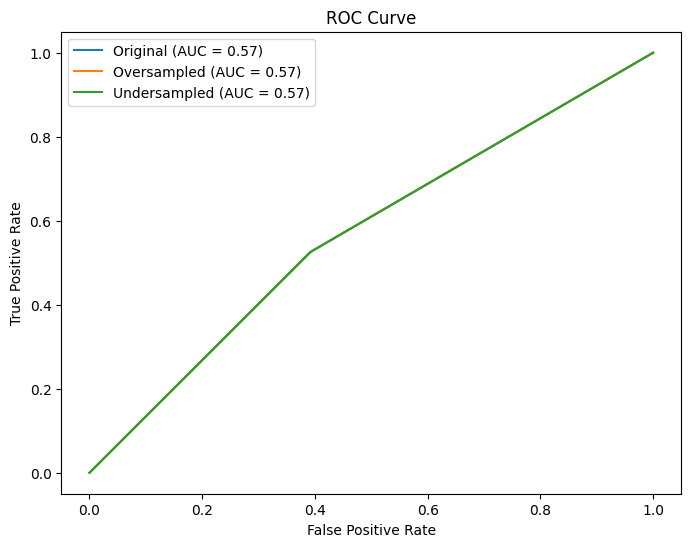

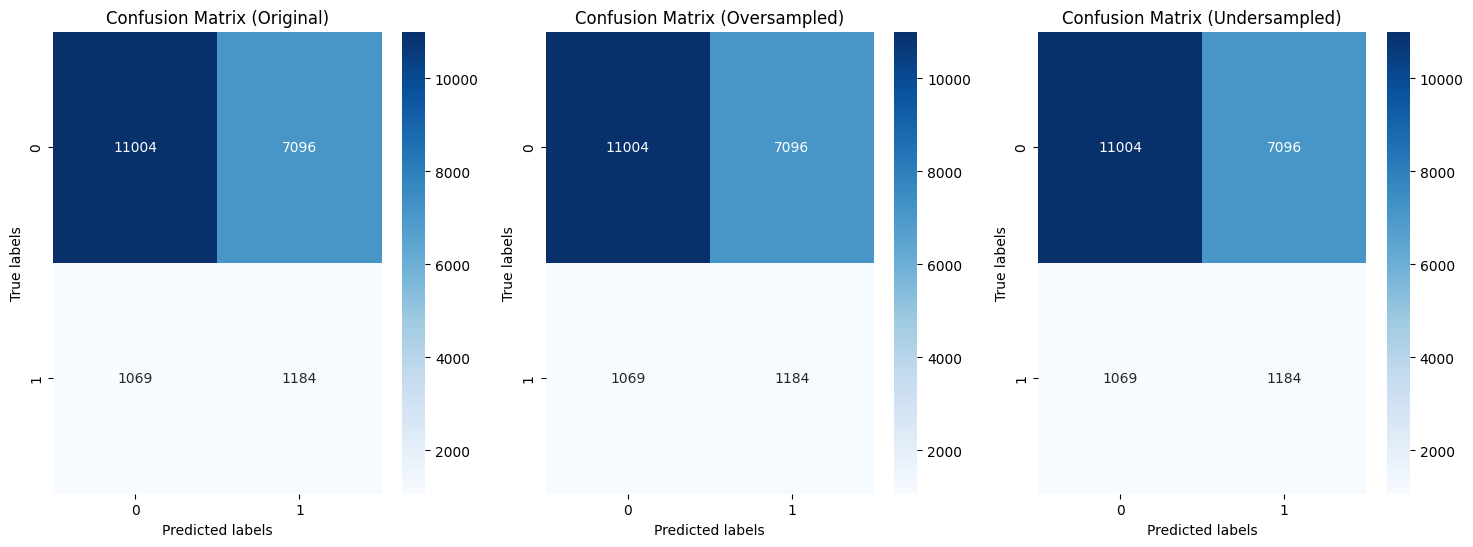

In [48]:
# Predictions 
y_pred_original = lstm_conv_model.predict(X_test_scaled_array)
y_pred_original = (y_pred_original > 0.5)
y_pred_oversampled = lstm_conv_model.predict(X_test_scaled_array)
y_pred_oversampled = (y_pred_oversampled > 0.5)
y_pred_undersampled = lstm_conv_model.predict(X_test_scaled_array)
y_pred_undersampled = (y_pred_undersampled > 0.5)

print("Classification Report on original test set:")
print(classification_report(y_test, y_pred_original))
print("Classification Report on oversampled test set:")
print(classification_report(y_test, y_pred_oversampled))
print("Classification Report on undersampled test set:")
print(classification_report(y_test, y_pred_undersampled))


def plot_roc_curve(y_true, y_pred, label):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_pred)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc_score:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

plt.figure(figsize=(8, 6))
plot_roc_curve(y_test, y_pred_original, label='Original')
plot_roc_curve(y_test, y_pred_oversampled, label='Oversampled')
plot_roc_curve(y_test, y_pred_undersampled, label='Undersampled')
plt.show()


def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plot_confusion_matrix(y_test, y_pred_original, title='Confusion Matrix (Original)')
plt.subplot(1, 3, 2)
plot_confusion_matrix(y_test, y_pred_oversampled, title='Confusion Matrix (Oversampled)')
plt.subplot(1, 3, 3)
plot_confusion_matrix(y_test, y_pred_undersampled, title='Confusion Matrix (Undersampled)')
plt.show()



MLP

In [97]:
from keras.models import Sequential
from keras.layers import Dense


def create_mlp_model(input_shape, hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, learning_rate='constant'):
    model = Sequential()
    model.add(Dense(units=hidden_layer_sizes[0], activation=activation, input_shape=input_shape))
    for layer_size in hidden_layer_sizes[1:]:
        model.add(Dense(units=layer_size, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=solver, loss='binary_crossentropy', metrics=['accuracy'])
    return model


input_shape = (X_train_scaled.shape[1],)
mlp_model = create_mlp_model(input_shape)

mlp_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)
accuracy_original = mlp_model.evaluate(X_test_scaled, y_test)[1]
print("Accuracy on original test set:", accuracy_original)

mlp_model.fit(X_train_oversampled, y_train_oversampled, epochs=10, batch_size=32, verbose=1)
accuracy_oversampled = mlp_model.evaluate(X_test_scaled, y_test)[1]
print("Accuracy on oversampled test set:", accuracy_oversampled)

mlp_model.fit(X_train_undersampled, y_train_undersampled, epochs=10, batch_size=32, verbose=1)
accuracy_undersampled = mlp_model.evaluate(X_test_scaled, y_test)[1]
print("Accuracy on undersampled test set:", accuracy_undersampled)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2545/2545 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8756 - loss: 0.3652
Epoch 2/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8894 - loss: 0.3334
Epoch 3/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8868 - loss: 0.3352
Epoch 4/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8858 - loss: 0.3367
Epoch 5/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8887 - loss: 0.3306
Epoch 6/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8862 - loss: 0.3350
Epoch 7/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8910 - loss: 0.3245
Epoch 8/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8884 - loss: 0.3301
Epoch 9/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8901 - loss: 0.3275
Epoch 10/10
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8892 - loss: 0.3292
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8867 - loss: 0.3399
Accuracy on original test set: 0.8887633085250854
Epoch

637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step
Classification Report on original test set:
               precision    recall  f1-score   support

           0       0.91      0.65      0.76     18100
           1       0.15      0.51      0.23      2253

    accuracy                           0.63     20353
   macro avg       0.53      0.58      0.50     20353
weighted avg       0.83      0.63      0.70     20353

Confusion Matrix on original test set:
 [[11691  6409]
 [ 1104  1149]]


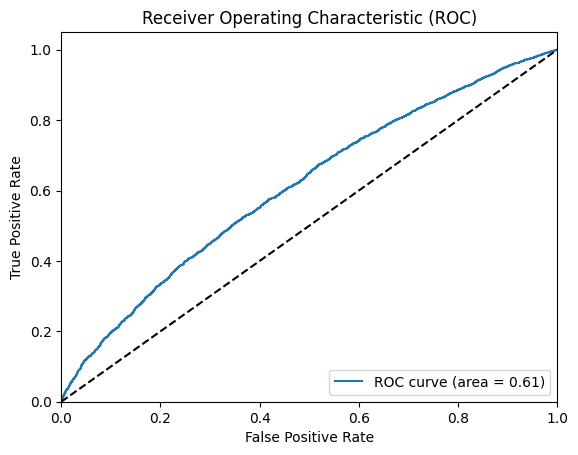

637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step
Classification Report on oversampled test set:
               precision    recall  f1-score   support

           0       0.91      0.65      0.76     18100
           1       0.15      0.51      0.23      2253

    accuracy                           0.63     20353
   macro avg       0.53      0.58      0.50     20353
weighted avg       0.83      0.63      0.70     20353

Confusion Matrix on oversampled test set:
 [[11691  6409]
 [ 1104  1149]]


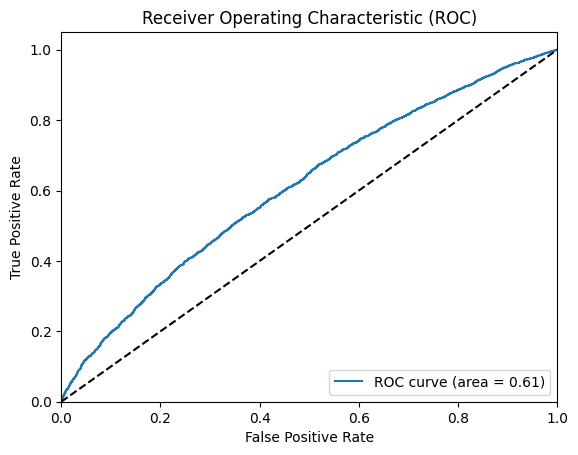

637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step
Classification Report on undersampled test set:
               precision    recall  f1-score   support

           0       0.91      0.65      0.76     18100
           1       0.15      0.51      0.23      2253

    accuracy                           0.63     20353
   macro avg       0.53      0.58      0.50     20353
weighted avg       0.83      0.63      0.70     20353

Confusion Matrix on undersampled test set:
 [[11691  6409]
 [ 1104  1149]]


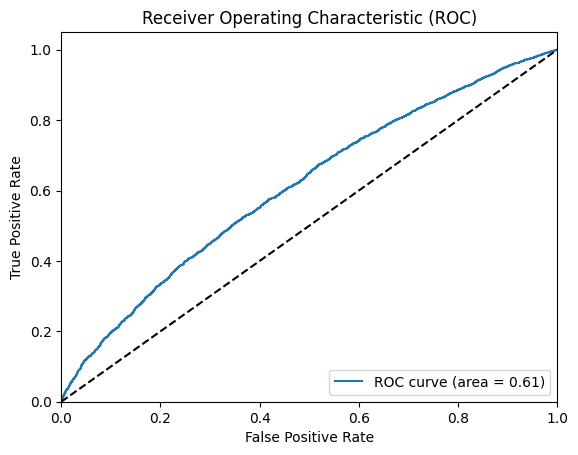

In [98]:
def plot_roc_curve(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_true, y_pred))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate 
y_pred_original = mlp_model.predict(X_test_scaled)
y_pred_original_binary = (y_pred_original > 0.5).astype(int)
print("Classification Report on original test set:\n", classification_report(y_test, y_pred_original_binary))
print("Confusion Matrix on original test set:\n", confusion_matrix(y_test, y_pred_original_binary))
plot_roc_curve(y_test, y_pred_original)

y_pred_oversampled = mlp_model.predict(X_test_scaled)
y_pred_oversampled_binary = (y_pred_oversampled > 0.5).astype(int)
print("Classification Report on oversampled test set:\n", classification_report(y_test, y_pred_oversampled_binary))
print("Confusion Matrix on oversampled test set:\n", confusion_matrix(y_test, y_pred_oversampled_binary))
plot_roc_curve(y_test, y_pred_oversampled)

y_pred_undersampled = mlp_model.predict(X_test_scaled)
y_pred_undersampled_binary = (y_pred_undersampled > 0.5).astype(int)
print("Classification Report on undersampled test set:\n", classification_report(y_test, y_pred_undersampled_binary))
print("Confusion Matrix on undersampled test set:\n", confusion_matrix(y_test, y_pred_undersampled_binary))
plot_roc_curve(y_test, y_pred_undersampled)

CNN

In [89]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.callbacks import EarlyStopping

def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

input_shape = (X_train_scaled.shape[1], 1)  # Adjust input shape for CNN
cnn_model = create_cnn_model(input_shape)

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model on the original dataset
cnn_model.fit(X_train_scaled.values.reshape(-1, X_train_scaled.shape[1], 1), y_train,
              epochs=50, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the original test set
accuracy_original = cnn_model.evaluate(X_test_scaled.values.reshape(-1, X_test_scaled.shape[1], 1), y_test)[1]
print("Accuracy on original test set:", accuracy_original)

# Train the model on the oversampled dataset
cnn_model.fit(X_train_oversampled.values.reshape(-1, X_train_oversampled.shape[1], 1), y_train_oversampled,
              epochs=50, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the oversampled test set
accuracy_oversampled = cnn_model.evaluate(X_test_scaled.values.reshape(-1, X_test_scaled.shape[1], 1), y_test)[1]
print("Accuracy on oversampled test set:", accuracy_oversampled)

# Train the model on the undersampled dataset
cnn_model.fit(X_train_undersampled.values.reshape(-1, X_train_undersampled.shape[1], 1), y_train_undersampled,
              epochs=50, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the undersampled test set
accuracy_undersampled = cnn_model.evaluate(X_test_scaled.values.reshape(-1, X_test_scaled.shape[1], 1), y_test)[1]
print("Accuracy on undersampled test set:", accuracy_undersampled)


Epoch 1/50
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8862 - loss: 0.3495 - val_accuracy: 0.8894 - val_loss: 0.3353
Epoch 2/50
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8887 - loss: 0.3369 - val_accuracy: 0.8894 - val_loss: 0.3338
Epoch 3/50
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8886 - loss: 0.3370 - val_accuracy: 0.8894 - val_loss: 0.3350
Epoch 4/50
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8863 - loss: 0.3410 - val_accuracy: 0.8891 - val_loss: 0.3340
Epoch 5/50
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8885 - loss: 0.3360 - val_accuracy: 0.8889 - val_loss: 0.3345
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8871 - loss: 0.3393
Accuracy on original test set: 0.8893038034439087
Epoch 1/50
3616/3616 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.6640 - loss: 0.6112 - val_accuracy: 0.5362 - val_loss: 0.7558
Epoch 2/50
3616/3616 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.7049 - loss: 0.5733 - 

637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report (Original):
              precision    recall  f1-score   support

           0       0.90      0.93      0.92     18100
           1       0.23      0.16      0.19      2253

    accuracy                           0.85     20353
   macro avg       0.56      0.55      0.55     20353
weighted avg       0.83      0.85      0.83     20353

Classification Report (Oversampled):
              precision    recall  f1-score   support

           0       0.90      0.93      0.92     18100
           1       0.23      0.16      0.19      2253

    accuracy                           0.85     20353
   macro avg       0.56      0.55      0.55     20353
weighted avg       0.83      0.85      0.83     20353

Classification Report (Undersampled):
              precision    recall  f1-score   support

           0       0.90      0.93      0.92     18100
     

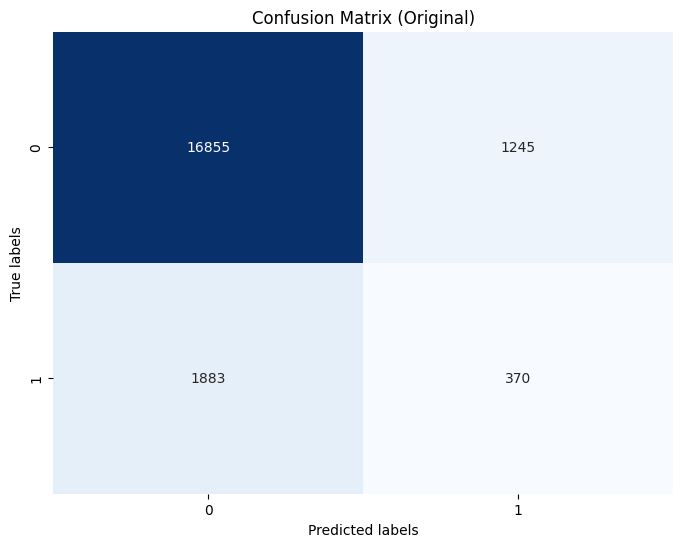

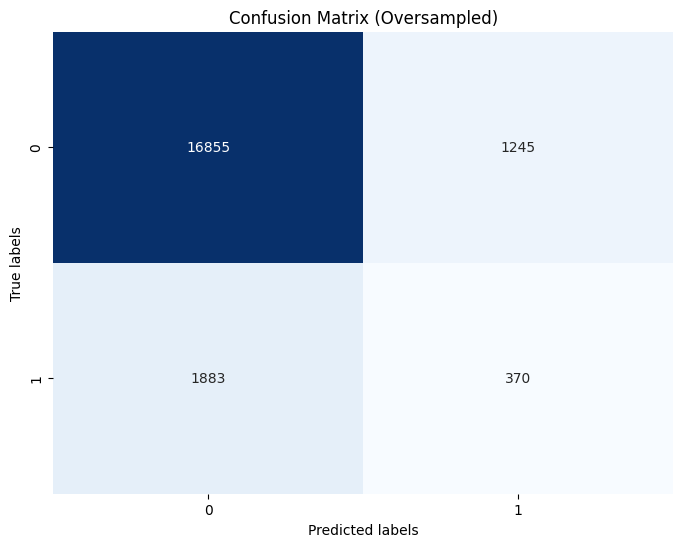

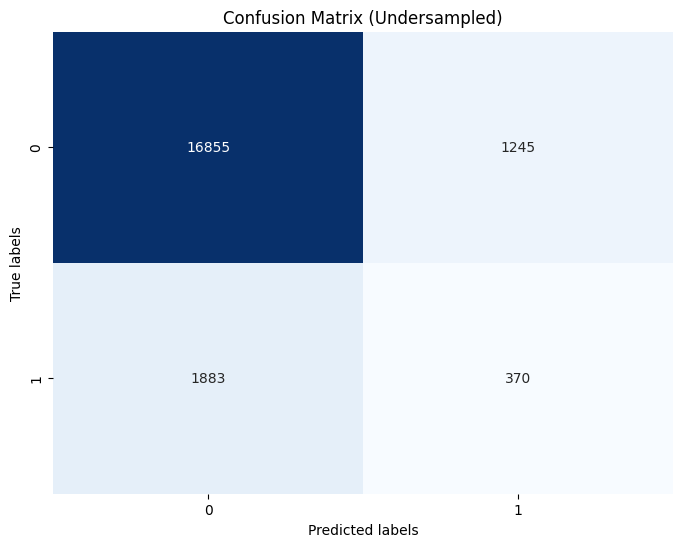

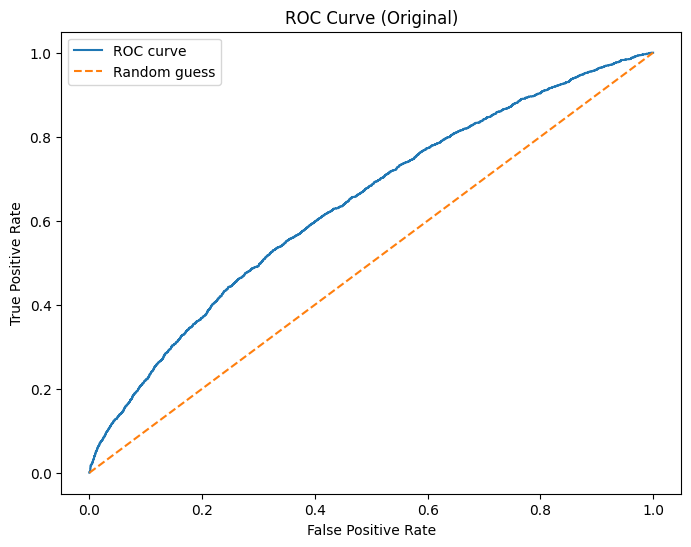

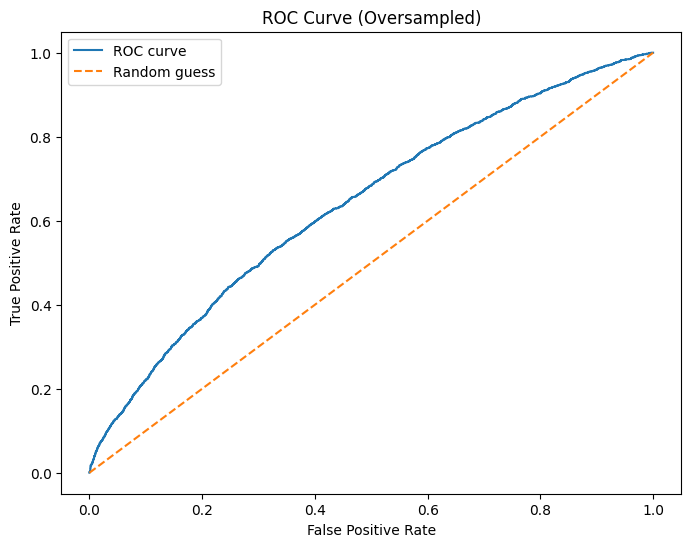

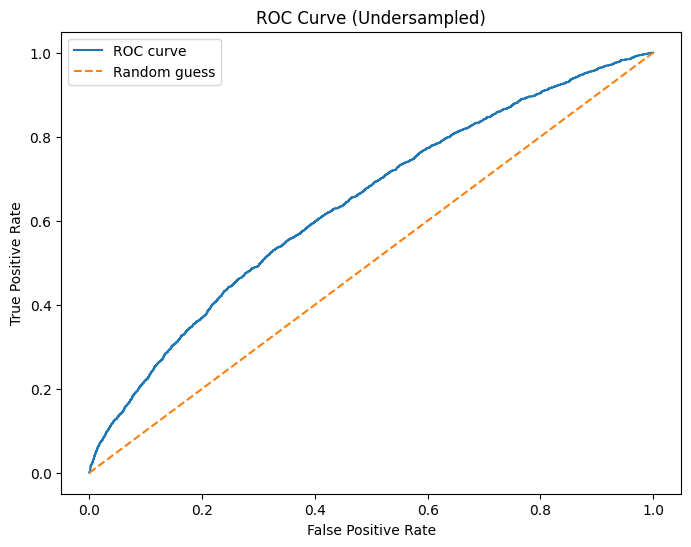

In [96]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred_probs, title):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label="ROC curve")
    plt.plot([0, 1], [0, 1], linestyle="--", label="Random guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend()
    plt.show()

# Define CNN model
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
# Predictions
y_pred_probs_original = cnn_model.predict(X_test_scaled)
y_pred_original = (y_pred_probs_original > 0.5).astype(int)

y_pred_probs_oversampled = cnn_model.predict(X_test_scaled)
y_pred_oversampled = (y_pred_probs_oversampled > 0.5).astype(int)

y_pred_probs_undersampled = cnn_model.predict(X_test_scaled)
y_pred_undersampled = (y_pred_probs_undersampled > 0.5).astype(int)

# Classification Report
print("Classification Report (Original):")
print(classification_report(y_test, y_pred_original))

print("Classification Report (Oversampled):")
print(classification_report(y_test, y_pred_oversampled))

print("Classification Report (Undersampled):")
print(classification_report(y_test, y_pred_undersampled))

# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_original, "Confusion Matrix (Original)")
plot_confusion_matrix(y_test, y_pred_oversampled, "Confusion Matrix (Oversampled)")
plot_confusion_matrix(y_test, y_pred_undersampled, "Confusion Matrix (Undersampled)")

# ROC Curve
plot_roc_curve(y_test, y_pred_probs_original, "ROC Curve (Original)")
plot_roc_curve(y_test, y_pred_probs_oversampled, "ROC Curve (Oversampled)")
plot_roc_curve(y_test, y_pred_probs_undersampled, "ROC Curve (Undersampled)")

